In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [91]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [92]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [93]:
#selecting only the required columns
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'Total_Pdn(yds)',
       'Rejection', 'warp_count',  'weft_count',
       'epi', 'ppi']]

In [94]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [95]:
df[['warp_count', 'weft_count', 'epi', 'ppi']]= df[['warp_count', 'weft_count', 'epi', 'ppi']].astype(str)

In [96]:
X = df.copy()
y = X.pop('Rejection')

In [97]:
X.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,50,50.0,140,70


In [98]:
X.select_dtypes('O')

,warp_count,weft_count,epi,ppi
0,double_40,80.0,110,80
1,40,40.0,110,90
2,40,40.0,110,80
3,40,40.0,130,80
4,50,50.0,140,70
...,...,...,...,...
22005,40,40.0,110,80
22006,40,40.0,92,70
22007,40,40.0,110,90
22008,50,50.0,110,80


In [99]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [102]:
X_train_ohe= ohe.fit_transform(X_train.select_dtypes('O'))
X_test_ohe = ohe.transform(X_test.select_dtypes('O'))

In [103]:
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out() )
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out() )

In [104]:
X_train_ohe_df.index = X_train.index
X_test_ohe_df.index = X_test.index

In [105]:
X_train_ok = pd.concat([X_train.select_dtypes(exclude='O'), X_train_ohe_df], axis=1)
X_test_ok = pd.concat([X_test.select_dtypes(exclude='O'), X_test_ohe_df], axis=1)

In [106]:
# X_train_sc.index 
X_train_ok.shape, X_test_ok.shape, y_train.shape

((15407, 65), (6603, 65), (15407,))

In [107]:
X_train_ok.tail()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),warp_count_100,warp_count_120,warp_count_20,...,ppi_72,ppi_76,ppi_80,ppi_84,ppi_86,ppi_88,ppi_90,ppi_94,ppi_96,ppi_98
13123,800.0,10.2,1049.8560,17.0,890.868597,981.470061,865.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19648,1235.0,9.2,103.8920,14.5,1360.132159,1454.643239,68.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,1950.0,9.0,2526.2160,15.0,2142.857143,2305.238116,1340.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,4250.0,7.0,5326.9256,14.0,4569.892473,4859.023827,4513.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2732,1500.0,13.4,1897.3960,10.0,1732.101617,1759.836642,350.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2 score

In [116]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train_ok, y_train)
        y_pred = model.predict(X_test_ok)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [117]:
r2_dict_df=calculate_r2_score(models, X_train_ohe, y_train, X_test_ohe)

Learning rate set to 0.063072
0:	learn: 158.7178955	total: 3.09ms	remaining: 3.09s
1:	learn: 151.5926185	total: 5.94ms	remaining: 2.96s
2:	learn: 145.2503260	total: 8.35ms	remaining: 2.77s
3:	learn: 138.9749667	total: 10.8ms	remaining: 2.69s
4:	learn: 133.3804037	total: 13.5ms	remaining: 2.68s
5:	learn: 128.0819037	total: 16ms	remaining: 2.65s
6:	learn: 123.0510303	total: 18.4ms	remaining: 2.61s
7:	learn: 118.3194970	total: 20.7ms	remaining: 2.57s
8:	learn: 114.1136154	total: 23ms	remaining: 2.54s
9:	learn: 110.1085814	total: 25.4ms	remaining: 2.51s
10:	learn: 106.6755173	total: 27.7ms	remaining: 2.49s
11:	learn: 103.3457690	total: 30.1ms	remaining: 2.48s
12:	learn: 100.1696972	total: 32.7ms	remaining: 2.48s
13:	learn: 97.2254916	total: 35.2ms	remaining: 2.48s
14:	learn: 94.5826790	total: 37.5ms	remaining: 2.46s
15:	learn: 92.0164696	total: 40ms	remaining: 2.46s
16:	learn: 89.7388333	total: 42.6ms	remaining: 2.46s
17:	learn: 87.6168816	total: 45ms	remaining: 2.46s
18:	learn: 85.6785210

163:	learn: 53.5703707	total: 396ms	remaining: 2.02s
164:	learn: 53.5550472	total: 398ms	remaining: 2.02s
165:	learn: 53.5360240	total: 401ms	remaining: 2.01s
166:	learn: 53.3221018	total: 403ms	remaining: 2.01s
167:	learn: 53.2410164	total: 405ms	remaining: 2.01s
168:	learn: 53.2038171	total: 408ms	remaining: 2s
169:	learn: 53.0877241	total: 412ms	remaining: 2.01s
170:	learn: 53.0244371	total: 415ms	remaining: 2.01s
171:	learn: 52.9518698	total: 419ms	remaining: 2.02s
172:	learn: 52.9091495	total: 422ms	remaining: 2.02s
173:	learn: 52.8790545	total: 425ms	remaining: 2.02s
174:	learn: 52.8522199	total: 427ms	remaining: 2.01s
175:	learn: 52.8335085	total: 429ms	remaining: 2.01s
176:	learn: 52.7881740	total: 432ms	remaining: 2.01s
177:	learn: 52.7323454	total: 435ms	remaining: 2.01s
178:	learn: 52.6887773	total: 438ms	remaining: 2.01s
179:	learn: 52.6343894	total: 440ms	remaining: 2s
180:	learn: 52.6195465	total: 443ms	remaining: 2s
181:	learn: 52.5811509	total: 445ms	remaining: 2s
182:	

328:	learn: 47.1169025	total: 789ms	remaining: 1.61s
329:	learn: 47.1022249	total: 792ms	remaining: 1.61s
330:	learn: 47.0774829	total: 794ms	remaining: 1.6s
331:	learn: 46.9966298	total: 797ms	remaining: 1.6s
332:	learn: 46.9793997	total: 799ms	remaining: 1.6s
333:	learn: 46.9627448	total: 801ms	remaining: 1.6s
334:	learn: 46.9467294	total: 804ms	remaining: 1.6s
335:	learn: 46.9293412	total: 807ms	remaining: 1.59s
336:	learn: 46.9154709	total: 809ms	remaining: 1.59s
337:	learn: 46.8988983	total: 811ms	remaining: 1.59s
338:	learn: 46.8862579	total: 813ms	remaining: 1.58s
339:	learn: 46.8743001	total: 816ms	remaining: 1.58s
340:	learn: 46.8485055	total: 818ms	remaining: 1.58s
341:	learn: 46.8343110	total: 821ms	remaining: 1.58s
342:	learn: 46.8228880	total: 823ms	remaining: 1.58s
343:	learn: 46.7980959	total: 825ms	remaining: 1.57s
344:	learn: 46.7669759	total: 827ms	remaining: 1.57s
345:	learn: 46.7333789	total: 830ms	remaining: 1.57s
346:	learn: 46.7117617	total: 832ms	remaining: 1.56

501:	learn: 44.1613044	total: 1.21s	remaining: 1.2s
502:	learn: 44.1433930	total: 1.21s	remaining: 1.19s
503:	learn: 44.1381523	total: 1.21s	remaining: 1.19s
504:	learn: 44.1313182	total: 1.21s	remaining: 1.19s
505:	learn: 44.1224514	total: 1.22s	remaining: 1.19s
506:	learn: 44.1108789	total: 1.22s	remaining: 1.19s
507:	learn: 44.1063114	total: 1.22s	remaining: 1.18s
508:	learn: 44.0871172	total: 1.22s	remaining: 1.18s
509:	learn: 44.0773467	total: 1.23s	remaining: 1.18s
510:	learn: 44.0519600	total: 1.23s	remaining: 1.18s
511:	learn: 44.0363814	total: 1.23s	remaining: 1.17s
512:	learn: 44.0173724	total: 1.23s	remaining: 1.17s
513:	learn: 44.0101118	total: 1.24s	remaining: 1.17s
514:	learn: 43.9969823	total: 1.24s	remaining: 1.17s
515:	learn: 43.9876426	total: 1.24s	remaining: 1.16s
516:	learn: 43.9649295	total: 1.24s	remaining: 1.16s
517:	learn: 43.9557408	total: 1.24s	remaining: 1.16s
518:	learn: 43.9518153	total: 1.25s	remaining: 1.16s
519:	learn: 43.9436358	total: 1.25s	remaining: 

670:	learn: 42.4164559	total: 1.6s	remaining: 787ms
671:	learn: 42.4086885	total: 1.61s	remaining: 785ms
672:	learn: 42.4023133	total: 1.61s	remaining: 783ms
673:	learn: 42.3966918	total: 1.61s	remaining: 780ms
674:	learn: 42.3926046	total: 1.61s	remaining: 778ms
675:	learn: 42.3815998	total: 1.62s	remaining: 776ms
676:	learn: 42.3768841	total: 1.62s	remaining: 773ms
677:	learn: 42.3736010	total: 1.62s	remaining: 771ms
678:	learn: 42.3703024	total: 1.63s	remaining: 769ms
679:	learn: 42.3645038	total: 1.63s	remaining: 766ms
680:	learn: 42.3582951	total: 1.63s	remaining: 764ms
681:	learn: 42.3550509	total: 1.63s	remaining: 761ms
682:	learn: 42.3417027	total: 1.64s	remaining: 759ms
683:	learn: 42.3395075	total: 1.64s	remaining: 756ms
684:	learn: 42.3037862	total: 1.64s	remaining: 754ms
685:	learn: 42.2951646	total: 1.64s	remaining: 752ms
686:	learn: 42.2903088	total: 1.64s	remaining: 749ms
687:	learn: 42.2867157	total: 1.65s	remaining: 747ms
688:	learn: 42.2820383	total: 1.65s	remaining: 

839:	learn: 41.4712716	total: 2s	remaining: 381ms
840:	learn: 41.4662190	total: 2s	remaining: 379ms
841:	learn: 41.4618336	total: 2.01s	remaining: 377ms
842:	learn: 41.4572311	total: 2.01s	remaining: 374ms
843:	learn: 41.4552986	total: 2.01s	remaining: 372ms
844:	learn: 41.4516396	total: 2.01s	remaining: 370ms
845:	learn: 41.4495984	total: 2.02s	remaining: 367ms
846:	learn: 41.4462158	total: 2.02s	remaining: 365ms
847:	learn: 41.4442785	total: 2.02s	remaining: 362ms
848:	learn: 41.4421617	total: 2.02s	remaining: 360ms
849:	learn: 41.4395053	total: 2.03s	remaining: 358ms
850:	learn: 41.4207901	total: 2.03s	remaining: 356ms
851:	learn: 41.4175409	total: 2.03s	remaining: 353ms
852:	learn: 41.4124737	total: 2.04s	remaining: 351ms
853:	learn: 41.4107326	total: 2.04s	remaining: 349ms
854:	learn: 41.4091130	total: 2.04s	remaining: 346ms
855:	learn: 41.4056853	total: 2.04s	remaining: 344ms
856:	learn: 41.4019754	total: 2.04s	remaining: 341ms
857:	learn: 41.3899980	total: 2.05s	remaining: 339ms

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.633e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(


In [118]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [119]:
r2_score_df

,models,r2_scores
0,light_gbm,0.938328
1,rnf,0.989498
2,cat,0.953169
3,xgboost,0.988473
4,lr,0.647604
5,laso,0.636383
6,elastonet,0.636230
7,elastonet_cv,0.634109
8,ridge,0.647584
9,decision_tree,0.990105


In [120]:
r2_score_df.to_csv('r2_score_dataset_3_ohe_no_gr_no_sc--corrected.csv', index = False)

# cross validation

In [45]:
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_ok, y_train, cv= kfold)
    cv_scores[name] = cv_results

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.062031
0:	learn: 157.9800461	total: 146ms	remaining: 2m 25s
1:	learn: 150.9277871	total: 149ms	remaining: 1m 14s
2:	learn: 144.7670073	total: 153ms	remaining: 50.8s
3:	learn: 138.6553109	total: 156ms	remaining: 38.8s
4:	learn: 133.0574627	total: 159ms	remaining: 31.5s
5:	learn: 127.8697367	total: 161ms	remaining: 26.7s
6:	learn: 122.9550037	total: 164ms	remaining: 23.2s
7:	learn: 118.3492764	total: 166ms	remaining: 20.6s
8:	learn: 114.1425383	total: 168ms	remaining: 18.5s
9:	learn: 110.2393054	total: 171ms	remaining: 16.9s
10:	learn: 106.7461784	total: 173ms	remaining: 15.6s
11:	learn: 103.4613052	total: 176ms	remaining: 14.5s
12:	learn: 100.3628935	total: 178ms	remaining: 13.5s
13:	learn: 97.6380305	total: 180ms	remaining: 12.7s
14:	learn: 94.9964705	total: 183ms	remaining: 12s
15:	learn: 92.5436599	total: 186ms	remaining: 11.4s
16:	learn: 90.2771970	total: 188ms	remaining: 10.9s
17:	learn: 88.1100426	total: 190ms	remaining: 10.4s
18:	learn: 86.2377558	total: 19

195:	learn: 53.2995973	total: 598ms	remaining: 2.45s
196:	learn: 53.2504100	total: 601ms	remaining: 2.45s
197:	learn: 53.2114000	total: 603ms	remaining: 2.44s
198:	learn: 53.1775134	total: 605ms	remaining: 2.43s
199:	learn: 53.1206655	total: 607ms	remaining: 2.43s
200:	learn: 53.1034839	total: 609ms	remaining: 2.42s
201:	learn: 53.0502603	total: 612ms	remaining: 2.42s
202:	learn: 53.0353467	total: 614ms	remaining: 2.41s
203:	learn: 52.9723763	total: 616ms	remaining: 2.4s
204:	learn: 52.9125427	total: 618ms	remaining: 2.4s
205:	learn: 52.8677970	total: 621ms	remaining: 2.39s
206:	learn: 52.8520248	total: 623ms	remaining: 2.38s
207:	learn: 52.8328747	total: 625ms	remaining: 2.38s
208:	learn: 52.7763303	total: 627ms	remaining: 2.37s
209:	learn: 52.7343909	total: 630ms	remaining: 2.37s
210:	learn: 52.6655521	total: 632ms	remaining: 2.36s
211:	learn: 52.6266370	total: 634ms	remaining: 2.36s
212:	learn: 52.5985020	total: 636ms	remaining: 2.35s
213:	learn: 52.5645557	total: 639ms	remaining: 2

366:	learn: 48.5901649	total: 992ms	remaining: 1.71s
367:	learn: 48.5775601	total: 994ms	remaining: 1.71s
368:	learn: 48.5571769	total: 997ms	remaining: 1.7s
369:	learn: 48.5395124	total: 999ms	remaining: 1.7s
370:	learn: 48.5289938	total: 1s	remaining: 1.7s
371:	learn: 48.5185576	total: 1s	remaining: 1.69s
372:	learn: 48.5128262	total: 1.01s	remaining: 1.69s
373:	learn: 48.4950353	total: 1.01s	remaining: 1.69s
374:	learn: 48.4620867	total: 1.01s	remaining: 1.68s
375:	learn: 48.4545786	total: 1.01s	remaining: 1.68s
376:	learn: 48.4494983	total: 1.01s	remaining: 1.68s
377:	learn: 48.4339921	total: 1.02s	remaining: 1.67s
378:	learn: 48.4037848	total: 1.02s	remaining: 1.67s
379:	learn: 48.3935796	total: 1.02s	remaining: 1.67s
380:	learn: 48.3832262	total: 1.02s	remaining: 1.66s
381:	learn: 48.3691158	total: 1.03s	remaining: 1.66s
382:	learn: 48.3580941	total: 1.03s	remaining: 1.66s
383:	learn: 48.3309966	total: 1.03s	remaining: 1.65s
384:	learn: 48.3210371	total: 1.03s	remaining: 1.65s
38

537:	learn: 46.2913573	total: 1.39s	remaining: 1.19s
538:	learn: 46.2845533	total: 1.39s	remaining: 1.19s
539:	learn: 46.2703994	total: 1.39s	remaining: 1.18s
540:	learn: 46.2671868	total: 1.39s	remaining: 1.18s
541:	learn: 46.2498604	total: 1.4s	remaining: 1.18s
542:	learn: 46.2401936	total: 1.4s	remaining: 1.18s
543:	learn: 46.2341415	total: 1.4s	remaining: 1.17s
544:	learn: 46.2273961	total: 1.4s	remaining: 1.17s
545:	learn: 46.2166833	total: 1.4s	remaining: 1.17s
546:	learn: 46.2068141	total: 1.41s	remaining: 1.17s
547:	learn: 46.1936784	total: 1.41s	remaining: 1.16s
548:	learn: 46.1836702	total: 1.41s	remaining: 1.16s
549:	learn: 46.1795750	total: 1.41s	remaining: 1.16s
550:	learn: 46.1700077	total: 1.42s	remaining: 1.15s
551:	learn: 46.1538979	total: 1.42s	remaining: 1.15s
552:	learn: 46.1479101	total: 1.42s	remaining: 1.15s
553:	learn: 46.1456524	total: 1.42s	remaining: 1.15s
554:	learn: 46.1364663	total: 1.43s	remaining: 1.14s
555:	learn: 46.1183479	total: 1.43s	remaining: 1.14

710:	learn: 44.8628702	total: 1.78s	remaining: 724ms
711:	learn: 44.8559483	total: 1.78s	remaining: 722ms
712:	learn: 44.8506200	total: 1.79s	remaining: 719ms
713:	learn: 44.8461177	total: 1.79s	remaining: 717ms
714:	learn: 44.8418740	total: 1.79s	remaining: 714ms
715:	learn: 44.8383670	total: 1.79s	remaining: 711ms
716:	learn: 44.8336600	total: 1.79s	remaining: 709ms
717:	learn: 44.8262110	total: 1.8s	remaining: 706ms
718:	learn: 44.8207002	total: 1.8s	remaining: 704ms
719:	learn: 44.8151335	total: 1.8s	remaining: 701ms
720:	learn: 44.8103782	total: 1.8s	remaining: 698ms
721:	learn: 44.8089540	total: 1.81s	remaining: 696ms
722:	learn: 44.8038889	total: 1.81s	remaining: 693ms
723:	learn: 44.7950143	total: 1.81s	remaining: 691ms
724:	learn: 44.7908359	total: 1.81s	remaining: 688ms
725:	learn: 44.7870403	total: 1.82s	remaining: 686ms
726:	learn: 44.7805617	total: 1.82s	remaining: 683ms
727:	learn: 44.7784239	total: 1.82s	remaining: 680ms
728:	learn: 44.7709061	total: 1.82s	remaining: 678

883:	learn: 44.0084556	total: 2.18s	remaining: 286ms
884:	learn: 44.0012789	total: 2.18s	remaining: 283ms
885:	learn: 43.9957099	total: 2.18s	remaining: 281ms
886:	learn: 43.9912513	total: 2.18s	remaining: 278ms
887:	learn: 43.9872192	total: 2.19s	remaining: 276ms
888:	learn: 43.9852121	total: 2.19s	remaining: 273ms
889:	learn: 43.9823988	total: 2.19s	remaining: 271ms
890:	learn: 43.9771172	total: 2.19s	remaining: 268ms
891:	learn: 43.9703635	total: 2.2s	remaining: 266ms
892:	learn: 43.9677328	total: 2.2s	remaining: 263ms
893:	learn: 43.9624982	total: 2.2s	remaining: 261ms
894:	learn: 43.9598604	total: 2.2s	remaining: 258ms
895:	learn: 43.9548703	total: 2.21s	remaining: 256ms
896:	learn: 43.9532699	total: 2.21s	remaining: 254ms
897:	learn: 43.9463192	total: 2.21s	remaining: 251ms
898:	learn: 43.9424668	total: 2.21s	remaining: 249ms
899:	learn: 43.9395009	total: 2.21s	remaining: 246ms
900:	learn: 43.9344547	total: 2.22s	remaining: 244ms
901:	learn: 43.9308017	total: 2.22s	remaining: 241

77:	learn: 60.0066891	total: 185ms	remaining: 2.19s
78:	learn: 59.9165818	total: 188ms	remaining: 2.19s
79:	learn: 59.8172294	total: 190ms	remaining: 2.18s
80:	learn: 59.7621390	total: 192ms	remaining: 2.18s
81:	learn: 59.5997348	total: 195ms	remaining: 2.18s
82:	learn: 59.5409227	total: 197ms	remaining: 2.17s
83:	learn: 59.4513490	total: 199ms	remaining: 2.17s
84:	learn: 59.3308893	total: 202ms	remaining: 2.18s
85:	learn: 59.2950080	total: 205ms	remaining: 2.18s
86:	learn: 59.2505367	total: 207ms	remaining: 2.17s
87:	learn: 59.1979940	total: 209ms	remaining: 2.17s
88:	learn: 58.8121827	total: 212ms	remaining: 2.17s
89:	learn: 58.6941360	total: 214ms	remaining: 2.17s
90:	learn: 58.6259829	total: 217ms	remaining: 2.17s
91:	learn: 58.5235225	total: 219ms	remaining: 2.16s
92:	learn: 58.4083768	total: 221ms	remaining: 2.16s
93:	learn: 58.1117211	total: 224ms	remaining: 2.16s
94:	learn: 58.0685135	total: 226ms	remaining: 2.16s
95:	learn: 57.9850948	total: 229ms	remaining: 2.16s
96:	learn: 5

239:	learn: 48.4275839	total: 580ms	remaining: 1.83s
240:	learn: 48.3737576	total: 583ms	remaining: 1.84s
241:	learn: 48.3469813	total: 586ms	remaining: 1.84s
242:	learn: 48.3371870	total: 589ms	remaining: 1.83s
243:	learn: 48.3003607	total: 592ms	remaining: 1.83s
244:	learn: 48.2916485	total: 595ms	remaining: 1.83s
245:	learn: 48.2566416	total: 598ms	remaining: 1.83s
246:	learn: 48.2244576	total: 601ms	remaining: 1.83s
247:	learn: 48.1858658	total: 603ms	remaining: 1.83s
248:	learn: 48.1631160	total: 606ms	remaining: 1.83s
249:	learn: 48.1166966	total: 609ms	remaining: 1.83s
250:	learn: 48.0952494	total: 612ms	remaining: 1.83s
251:	learn: 48.0728215	total: 615ms	remaining: 1.82s
252:	learn: 48.0104098	total: 618ms	remaining: 1.82s
253:	learn: 47.8713217	total: 620ms	remaining: 1.82s
254:	learn: 47.8512383	total: 623ms	remaining: 1.82s
255:	learn: 47.7975157	total: 626ms	remaining: 1.82s
256:	learn: 47.7788462	total: 629ms	remaining: 1.82s
257:	learn: 47.7591255	total: 631ms	remaining:

465:	learn: 43.1870118	total: 1.17s	remaining: 1.34s
466:	learn: 43.1787610	total: 1.17s	remaining: 1.34s
467:	learn: 43.1697733	total: 1.17s	remaining: 1.33s
468:	learn: 43.1606700	total: 1.18s	remaining: 1.33s
469:	learn: 43.1501730	total: 1.18s	remaining: 1.33s
470:	learn: 43.1365714	total: 1.18s	remaining: 1.33s
471:	learn: 43.0868607	total: 1.18s	remaining: 1.32s
472:	learn: 43.0814222	total: 1.19s	remaining: 1.32s
473:	learn: 43.0708347	total: 1.19s	remaining: 1.32s
474:	learn: 43.0650792	total: 1.19s	remaining: 1.31s
475:	learn: 43.0458717	total: 1.19s	remaining: 1.31s
476:	learn: 43.0267592	total: 1.2s	remaining: 1.31s
477:	learn: 43.0176829	total: 1.2s	remaining: 1.31s
478:	learn: 43.0006073	total: 1.2s	remaining: 1.3s
479:	learn: 42.9938431	total: 1.2s	remaining: 1.3s
480:	learn: 42.9822580	total: 1.2s	remaining: 1.3s
481:	learn: 42.9719901	total: 1.21s	remaining: 1.3s
482:	learn: 42.9595050	total: 1.21s	remaining: 1.29s
483:	learn: 42.9379050	total: 1.21s	remaining: 1.29s
48

633:	learn: 41.4720187	total: 1.56s	remaining: 903ms
634:	learn: 41.4655272	total: 1.57s	remaining: 901ms
635:	learn: 41.4589119	total: 1.57s	remaining: 898ms
636:	learn: 41.4529106	total: 1.57s	remaining: 896ms
637:	learn: 41.4489785	total: 1.57s	remaining: 894ms
638:	learn: 41.4460722	total: 1.58s	remaining: 891ms
639:	learn: 41.4307157	total: 1.58s	remaining: 889ms
640:	learn: 41.4239325	total: 1.58s	remaining: 886ms
641:	learn: 41.4218922	total: 1.58s	remaining: 884ms
642:	learn: 41.4162913	total: 1.59s	remaining: 882ms
643:	learn: 41.4095040	total: 1.59s	remaining: 879ms
644:	learn: 41.4025836	total: 1.59s	remaining: 877ms
645:	learn: 41.3975912	total: 1.6s	remaining: 875ms
646:	learn: 41.3920831	total: 1.6s	remaining: 872ms
647:	learn: 41.3823226	total: 1.6s	remaining: 870ms
648:	learn: 41.3731955	total: 1.6s	remaining: 867ms
649:	learn: 41.3676527	total: 1.61s	remaining: 865ms
650:	learn: 41.3621323	total: 1.61s	remaining: 862ms
651:	learn: 41.3536293	total: 1.61s	remaining: 860

800:	learn: 40.3784278	total: 1.96s	remaining: 486ms
801:	learn: 40.3724295	total: 1.96s	remaining: 484ms
802:	learn: 40.3680293	total: 1.96s	remaining: 482ms
803:	learn: 40.3624902	total: 1.97s	remaining: 479ms
804:	learn: 40.3583499	total: 1.97s	remaining: 477ms
805:	learn: 40.3555236	total: 1.97s	remaining: 474ms
806:	learn: 40.3500845	total: 1.97s	remaining: 472ms
807:	learn: 40.3477357	total: 1.98s	remaining: 469ms
808:	learn: 40.3421801	total: 1.98s	remaining: 467ms
809:	learn: 40.3370122	total: 1.98s	remaining: 464ms
810:	learn: 40.3323638	total: 1.98s	remaining: 462ms
811:	learn: 40.3280738	total: 1.98s	remaining: 459ms
812:	learn: 40.3207094	total: 1.99s	remaining: 457ms
813:	learn: 40.3173204	total: 1.99s	remaining: 454ms
814:	learn: 40.3155132	total: 1.99s	remaining: 452ms
815:	learn: 40.3102740	total: 1.99s	remaining: 450ms
816:	learn: 40.3064572	total: 2s	remaining: 447ms
817:	learn: 40.3010807	total: 2s	remaining: 445ms
818:	learn: 40.2982837	total: 2s	remaining: 442ms
81

966:	learn: 39.6919253	total: 2.35s	remaining: 80.3ms
967:	learn: 39.6893258	total: 2.35s	remaining: 77.8ms
968:	learn: 39.6861095	total: 2.36s	remaining: 75.4ms
969:	learn: 39.6816522	total: 2.36s	remaining: 73ms
970:	learn: 39.6764551	total: 2.36s	remaining: 70.5ms
971:	learn: 39.6744536	total: 2.36s	remaining: 68.1ms
972:	learn: 39.6718386	total: 2.37s	remaining: 65.7ms
973:	learn: 39.6708510	total: 2.37s	remaining: 63.2ms
974:	learn: 39.6652869	total: 2.37s	remaining: 60.8ms
975:	learn: 39.6643720	total: 2.37s	remaining: 58.4ms
976:	learn: 39.6628832	total: 2.38s	remaining: 55.9ms
977:	learn: 39.6596775	total: 2.38s	remaining: 53.5ms
978:	learn: 39.6573526	total: 2.38s	remaining: 51.1ms
979:	learn: 39.6532217	total: 2.38s	remaining: 48.6ms
980:	learn: 39.6501735	total: 2.38s	remaining: 46.2ms
981:	learn: 39.6413694	total: 2.39s	remaining: 43.8ms
982:	learn: 39.6314095	total: 2.39s	remaining: 41.3ms
983:	learn: 39.6181033	total: 2.39s	remaining: 38.9ms
984:	learn: 39.6159402	total: 

169:	learn: 54.9563959	total: 393ms	remaining: 1.92s
170:	learn: 54.9033640	total: 395ms	remaining: 1.92s
171:	learn: 54.8612669	total: 398ms	remaining: 1.91s
172:	learn: 54.7943372	total: 400ms	remaining: 1.91s
173:	learn: 54.7503800	total: 402ms	remaining: 1.91s
174:	learn: 54.7326070	total: 404ms	remaining: 1.91s
175:	learn: 54.6571049	total: 406ms	remaining: 1.9s
176:	learn: 54.6065264	total: 409ms	remaining: 1.9s
177:	learn: 54.5515972	total: 411ms	remaining: 1.9s
178:	learn: 54.5009263	total: 413ms	remaining: 1.89s
179:	learn: 54.4358180	total: 415ms	remaining: 1.89s
180:	learn: 54.3899826	total: 417ms	remaining: 1.89s
181:	learn: 54.3277229	total: 420ms	remaining: 1.89s
182:	learn: 54.2860099	total: 422ms	remaining: 1.88s
183:	learn: 54.2713743	total: 424ms	remaining: 1.88s
184:	learn: 54.1745406	total: 426ms	remaining: 1.88s
185:	learn: 54.1501706	total: 428ms	remaining: 1.88s
186:	learn: 54.0944131	total: 431ms	remaining: 1.87s
187:	learn: 54.0748138	total: 433ms	remaining: 1.

335:	learn: 49.7142042	total: 787ms	remaining: 1.55s
336:	learn: 49.6823682	total: 790ms	remaining: 1.55s
337:	learn: 49.6712888	total: 792ms	remaining: 1.55s
338:	learn: 49.6370048	total: 794ms	remaining: 1.55s
339:	learn: 49.6197443	total: 797ms	remaining: 1.55s
340:	learn: 49.6122978	total: 799ms	remaining: 1.54s
341:	learn: 49.5911766	total: 802ms	remaining: 1.54s
342:	learn: 49.5708069	total: 804ms	remaining: 1.54s
343:	learn: 49.5547929	total: 807ms	remaining: 1.54s
344:	learn: 49.5378138	total: 809ms	remaining: 1.53s
345:	learn: 49.5245802	total: 811ms	remaining: 1.53s
346:	learn: 49.4690859	total: 814ms	remaining: 1.53s
347:	learn: 49.4481296	total: 816ms	remaining: 1.53s
348:	learn: 49.4272366	total: 818ms	remaining: 1.53s
349:	learn: 49.4165014	total: 821ms	remaining: 1.52s
350:	learn: 49.3946521	total: 823ms	remaining: 1.52s
351:	learn: 49.3619651	total: 825ms	remaining: 1.52s
352:	learn: 49.3236706	total: 827ms	remaining: 1.52s
353:	learn: 49.3046727	total: 830ms	remaining:

565:	learn: 46.5863062	total: 1.38s	remaining: 1.05s
566:	learn: 46.5774119	total: 1.38s	remaining: 1.05s
567:	learn: 46.5715728	total: 1.38s	remaining: 1.05s
568:	learn: 46.5697972	total: 1.38s	remaining: 1.05s
569:	learn: 46.5604664	total: 1.39s	remaining: 1.04s
570:	learn: 46.5569261	total: 1.39s	remaining: 1.04s
571:	learn: 46.5481360	total: 1.39s	remaining: 1.04s
572:	learn: 46.5392940	total: 1.39s	remaining: 1.04s
573:	learn: 46.5320848	total: 1.4s	remaining: 1.03s
574:	learn: 46.5247330	total: 1.4s	remaining: 1.03s
575:	learn: 46.5215278	total: 1.4s	remaining: 1.03s
576:	learn: 46.5141493	total: 1.4s	remaining: 1.03s
577:	learn: 46.5112140	total: 1.4s	remaining: 1.02s
578:	learn: 46.5044918	total: 1.41s	remaining: 1.02s
579:	learn: 46.4838219	total: 1.41s	remaining: 1.02s
580:	learn: 46.4779559	total: 1.41s	remaining: 1.02s
581:	learn: 46.4746105	total: 1.41s	remaining: 1.01s
582:	learn: 46.4537450	total: 1.42s	remaining: 1.01s
583:	learn: 46.4470741	total: 1.42s	remaining: 1.01

723:	learn: 45.3920936	total: 1.77s	remaining: 675ms
724:	learn: 45.3898639	total: 1.77s	remaining: 672ms
725:	learn: 45.3829950	total: 1.77s	remaining: 670ms
726:	learn: 45.3738772	total: 1.78s	remaining: 668ms
727:	learn: 45.3683719	total: 1.78s	remaining: 665ms
728:	learn: 45.3637379	total: 1.78s	remaining: 663ms
729:	learn: 45.3570626	total: 1.78s	remaining: 660ms
730:	learn: 45.3477630	total: 1.79s	remaining: 658ms
731:	learn: 45.3423646	total: 1.79s	remaining: 655ms
732:	learn: 45.3374279	total: 1.79s	remaining: 653ms
733:	learn: 45.3351252	total: 1.8s	remaining: 651ms
734:	learn: 45.3273072	total: 1.8s	remaining: 649ms
735:	learn: 45.3224599	total: 1.8s	remaining: 647ms
736:	learn: 45.3191027	total: 1.8s	remaining: 644ms
737:	learn: 45.3136790	total: 1.81s	remaining: 642ms
738:	learn: 45.3052805	total: 1.81s	remaining: 640ms
739:	learn: 45.2969356	total: 1.81s	remaining: 637ms
740:	learn: 45.2872287	total: 1.81s	remaining: 635ms
741:	learn: 45.2797985	total: 1.82s	remaining: 632

886:	learn: 44.5408549	total: 2.16s	remaining: 276ms
887:	learn: 44.5378544	total: 2.17s	remaining: 273ms
888:	learn: 44.5349970	total: 2.17s	remaining: 271ms
889:	learn: 44.5319908	total: 2.17s	remaining: 268ms
890:	learn: 44.5293677	total: 2.17s	remaining: 266ms
891:	learn: 44.5187481	total: 2.18s	remaining: 264ms
892:	learn: 44.5125439	total: 2.18s	remaining: 261ms
893:	learn: 44.5088530	total: 2.18s	remaining: 259ms
894:	learn: 44.5067025	total: 2.18s	remaining: 256ms
895:	learn: 44.5049036	total: 2.19s	remaining: 254ms
896:	learn: 44.5026897	total: 2.19s	remaining: 251ms
897:	learn: 44.4975394	total: 2.19s	remaining: 249ms
898:	learn: 44.4953630	total: 2.19s	remaining: 246ms
899:	learn: 44.4887070	total: 2.19s	remaining: 244ms
900:	learn: 44.4849532	total: 2.2s	remaining: 241ms
901:	learn: 44.4793870	total: 2.2s	remaining: 239ms
902:	learn: 44.4768925	total: 2.2s	remaining: 237ms
903:	learn: 44.4739155	total: 2.2s	remaining: 234ms
904:	learn: 44.4709010	total: 2.21s	remaining: 232

56:	learn: 64.5674724	total: 196ms	remaining: 3.24s
57:	learn: 64.3056495	total: 198ms	remaining: 3.22s
58:	learn: 64.1820553	total: 200ms	remaining: 3.19s
59:	learn: 64.0650885	total: 203ms	remaining: 3.17s
60:	learn: 63.9337005	total: 205ms	remaining: 3.15s
61:	learn: 63.8551853	total: 207ms	remaining: 3.13s
62:	learn: 63.7664510	total: 209ms	remaining: 3.11s
63:	learn: 63.5959322	total: 211ms	remaining: 3.09s
64:	learn: 63.4755922	total: 213ms	remaining: 3.07s
65:	learn: 63.2849734	total: 216ms	remaining: 3.05s
66:	learn: 63.1959617	total: 218ms	remaining: 3.03s
67:	learn: 63.1152983	total: 220ms	remaining: 3.02s
68:	learn: 63.0379932	total: 222ms	remaining: 3s
69:	learn: 62.9066970	total: 225ms	remaining: 2.98s
70:	learn: 62.8208677	total: 227ms	remaining: 2.97s
71:	learn: 62.7548869	total: 229ms	remaining: 2.95s
72:	learn: 62.6821438	total: 231ms	remaining: 2.94s
73:	learn: 62.6063273	total: 233ms	remaining: 2.92s
74:	learn: 62.3983714	total: 236ms	remaining: 2.91s
75:	learn: 62.2

230:	learn: 53.9536080	total: 592ms	remaining: 1.97s
231:	learn: 53.9431678	total: 595ms	remaining: 1.97s
232:	learn: 53.9234047	total: 597ms	remaining: 1.96s
233:	learn: 53.9136579	total: 599ms	remaining: 1.96s
234:	learn: 53.8786644	total: 601ms	remaining: 1.96s
235:	learn: 53.8386106	total: 604ms	remaining: 1.95s
236:	learn: 53.8124567	total: 606ms	remaining: 1.95s
237:	learn: 53.7528126	total: 608ms	remaining: 1.95s
238:	learn: 53.7272846	total: 610ms	remaining: 1.94s
239:	learn: 53.7089859	total: 612ms	remaining: 1.94s
240:	learn: 53.6730209	total: 615ms	remaining: 1.94s
241:	learn: 53.6227894	total: 617ms	remaining: 1.93s
242:	learn: 53.6066687	total: 619ms	remaining: 1.93s
243:	learn: 53.5707286	total: 622ms	remaining: 1.93s
244:	learn: 53.5588517	total: 624ms	remaining: 1.92s
245:	learn: 53.5349785	total: 627ms	remaining: 1.92s
246:	learn: 53.5225797	total: 629ms	remaining: 1.92s
247:	learn: 53.4955691	total: 631ms	remaining: 1.91s
248:	learn: 53.4611265	total: 633ms	remaining:

402:	learn: 50.4519878	total: 986ms	remaining: 1.46s
403:	learn: 50.4392328	total: 988ms	remaining: 1.46s
404:	learn: 50.4274320	total: 991ms	remaining: 1.46s
405:	learn: 50.4187123	total: 993ms	remaining: 1.45s
406:	learn: 50.4044171	total: 995ms	remaining: 1.45s
407:	learn: 50.3954514	total: 998ms	remaining: 1.45s
408:	learn: 50.3890837	total: 1000ms	remaining: 1.44s
409:	learn: 50.3642481	total: 1s	remaining: 1.44s
410:	learn: 50.3595607	total: 1s	remaining: 1.44s
411:	learn: 50.3521435	total: 1.01s	remaining: 1.44s
412:	learn: 50.3415856	total: 1.01s	remaining: 1.43s
413:	learn: 50.3235659	total: 1.01s	remaining: 1.43s
414:	learn: 50.3111538	total: 1.01s	remaining: 1.43s
415:	learn: 50.2991397	total: 1.01s	remaining: 1.43s
416:	learn: 50.2845020	total: 1.02s	remaining: 1.42s
417:	learn: 50.2776840	total: 1.02s	remaining: 1.42s
418:	learn: 50.2666605	total: 1.02s	remaining: 1.42s
419:	learn: 50.2595908	total: 1.02s	remaining: 1.42s
420:	learn: 50.2538776	total: 1.03s	remaining: 1.41

572:	learn: 48.5453797	total: 1.38s	remaining: 1.03s
573:	learn: 48.5413597	total: 1.38s	remaining: 1.03s
574:	learn: 48.5345502	total: 1.39s	remaining: 1.02s
575:	learn: 48.5250751	total: 1.39s	remaining: 1.02s
576:	learn: 48.5139001	total: 1.39s	remaining: 1.02s
577:	learn: 48.5053358	total: 1.39s	remaining: 1.02s
578:	learn: 48.4964276	total: 1.4s	remaining: 1.01s
579:	learn: 48.4859512	total: 1.4s	remaining: 1.01s
580:	learn: 48.4796237	total: 1.4s	remaining: 1.01s
581:	learn: 48.4720673	total: 1.4s	remaining: 1.01s
582:	learn: 48.4641785	total: 1.41s	remaining: 1.01s
583:	learn: 48.4619646	total: 1.41s	remaining: 1s
584:	learn: 48.4538155	total: 1.41s	remaining: 1s
585:	learn: 48.4412183	total: 1.41s	remaining: 999ms
586:	learn: 48.4379792	total: 1.42s	remaining: 997ms
587:	learn: 48.4275705	total: 1.42s	remaining: 994ms
588:	learn: 48.4183426	total: 1.42s	remaining: 992ms
589:	learn: 48.4107857	total: 1.42s	remaining: 990ms
590:	learn: 48.3826156	total: 1.43s	remaining: 987ms
591

742:	learn: 47.3659530	total: 1.78s	remaining: 615ms
743:	learn: 47.3643926	total: 1.78s	remaining: 613ms
744:	learn: 47.3624072	total: 1.78s	remaining: 610ms
745:	learn: 47.3608799	total: 1.78s	remaining: 608ms
746:	learn: 47.3560964	total: 1.79s	remaining: 605ms
747:	learn: 47.3513340	total: 1.79s	remaining: 603ms
748:	learn: 47.3466580	total: 1.79s	remaining: 600ms
749:	learn: 47.3431706	total: 1.79s	remaining: 598ms
750:	learn: 47.3360496	total: 1.8s	remaining: 596ms
751:	learn: 47.3310335	total: 1.8s	remaining: 593ms
752:	learn: 47.3277412	total: 1.8s	remaining: 591ms
753:	learn: 47.3253848	total: 1.8s	remaining: 588ms
754:	learn: 47.3212199	total: 1.8s	remaining: 586ms
755:	learn: 47.3178612	total: 1.81s	remaining: 584ms
756:	learn: 47.3123155	total: 1.81s	remaining: 581ms
757:	learn: 47.3075170	total: 1.81s	remaining: 579ms
758:	learn: 47.3062634	total: 1.81s	remaining: 576ms
759:	learn: 47.2998414	total: 1.82s	remaining: 574ms
760:	learn: 47.2916940	total: 1.82s	remaining: 571m

912:	learn: 46.6020952	total: 2.17s	remaining: 207ms
913:	learn: 46.5995183	total: 2.17s	remaining: 205ms
914:	learn: 46.5949939	total: 2.18s	remaining: 202ms
915:	learn: 46.5916847	total: 2.18s	remaining: 200ms
916:	learn: 46.5887372	total: 2.18s	remaining: 197ms
917:	learn: 46.5858242	total: 2.18s	remaining: 195ms
918:	learn: 46.5846393	total: 2.19s	remaining: 193ms
919:	learn: 46.5778229	total: 2.19s	remaining: 190ms
920:	learn: 46.5758741	total: 2.19s	remaining: 188ms
921:	learn: 46.5716755	total: 2.19s	remaining: 186ms
922:	learn: 46.5698465	total: 2.19s	remaining: 183ms
923:	learn: 46.5672645	total: 2.2s	remaining: 181ms
924:	learn: 46.5626292	total: 2.2s	remaining: 178ms
925:	learn: 46.5577898	total: 2.2s	remaining: 176ms
926:	learn: 46.5561383	total: 2.21s	remaining: 174ms
927:	learn: 46.5541189	total: 2.21s	remaining: 171ms
928:	learn: 46.5505136	total: 2.21s	remaining: 169ms
929:	learn: 46.5404591	total: 2.21s	remaining: 167ms
930:	learn: 46.5393357	total: 2.21s	remaining: 16

79:	learn: 60.5324373	total: 193ms	remaining: 2.22s
80:	learn: 60.4287523	total: 195ms	remaining: 2.22s
81:	learn: 60.3201914	total: 198ms	remaining: 2.21s
82:	learn: 60.2623926	total: 200ms	remaining: 2.21s
83:	learn: 60.2159668	total: 202ms	remaining: 2.2s
84:	learn: 60.1362656	total: 204ms	remaining: 2.2s
85:	learn: 60.0898088	total: 206ms	remaining: 2.19s
86:	learn: 60.0125128	total: 209ms	remaining: 2.19s
87:	learn: 59.9471962	total: 211ms	remaining: 2.19s
88:	learn: 59.8669849	total: 213ms	remaining: 2.18s
89:	learn: 59.7969830	total: 215ms	remaining: 2.18s
90:	learn: 59.6890458	total: 218ms	remaining: 2.17s
91:	learn: 59.6163278	total: 220ms	remaining: 2.17s
92:	learn: 59.4940530	total: 222ms	remaining: 2.17s
93:	learn: 59.4158251	total: 225ms	remaining: 2.17s
94:	learn: 59.3450243	total: 227ms	remaining: 2.16s
95:	learn: 59.3052509	total: 229ms	remaining: 2.16s
96:	learn: 59.2506076	total: 231ms	remaining: 2.15s
97:	learn: 59.1904769	total: 234ms	remaining: 2.15s
98:	learn: 59.

296:	learn: 49.0329022	total: 746ms	remaining: 1.77s
297:	learn: 49.0224617	total: 749ms	remaining: 1.76s
298:	learn: 48.9991284	total: 751ms	remaining: 1.76s
299:	learn: 48.9930341	total: 753ms	remaining: 1.76s
300:	learn: 48.9455816	total: 756ms	remaining: 1.75s
301:	learn: 48.9194259	total: 758ms	remaining: 1.75s
302:	learn: 48.9012791	total: 760ms	remaining: 1.75s
303:	learn: 48.8849273	total: 762ms	remaining: 1.75s
304:	learn: 48.8472379	total: 765ms	remaining: 1.74s
305:	learn: 48.8205260	total: 767ms	remaining: 1.74s
306:	learn: 48.7337276	total: 769ms	remaining: 1.74s
307:	learn: 48.7248674	total: 771ms	remaining: 1.73s
308:	learn: 48.7159023	total: 774ms	remaining: 1.73s
309:	learn: 48.6965324	total: 776ms	remaining: 1.73s
310:	learn: 48.6794348	total: 778ms	remaining: 1.72s
311:	learn: 48.6722066	total: 781ms	remaining: 1.72s
312:	learn: 48.6364667	total: 783ms	remaining: 1.72s
313:	learn: 48.6269208	total: 785ms	remaining: 1.71s
314:	learn: 48.6137231	total: 787ms	remaining:

457:	learn: 45.8981190	total: 1.14s	remaining: 1.35s
458:	learn: 45.8717536	total: 1.14s	remaining: 1.35s
459:	learn: 45.8667304	total: 1.14s	remaining: 1.34s
460:	learn: 45.7828854	total: 1.15s	remaining: 1.34s
461:	learn: 45.7695506	total: 1.15s	remaining: 1.34s
462:	learn: 45.6945923	total: 1.15s	remaining: 1.33s
463:	learn: 45.6847603	total: 1.15s	remaining: 1.33s
464:	learn: 45.6718867	total: 1.16s	remaining: 1.33s
465:	learn: 45.6597044	total: 1.16s	remaining: 1.33s
466:	learn: 45.5943357	total: 1.16s	remaining: 1.32s
467:	learn: 45.5841527	total: 1.16s	remaining: 1.32s
468:	learn: 45.5686699	total: 1.17s	remaining: 1.32s
469:	learn: 45.5588242	total: 1.17s	remaining: 1.32s
470:	learn: 45.5482433	total: 1.17s	remaining: 1.31s
471:	learn: 45.5280914	total: 1.17s	remaining: 1.31s
472:	learn: 45.5191939	total: 1.18s	remaining: 1.31s
473:	learn: 45.5118935	total: 1.18s	remaining: 1.31s
474:	learn: 45.5061120	total: 1.18s	remaining: 1.3s
475:	learn: 45.4909551	total: 1.18s	remaining: 

626:	learn: 43.9566408	total: 1.54s	remaining: 915ms
627:	learn: 43.9535408	total: 1.54s	remaining: 913ms
628:	learn: 43.9448294	total: 1.54s	remaining: 910ms
629:	learn: 43.9388619	total: 1.54s	remaining: 908ms
630:	learn: 43.9367549	total: 1.55s	remaining: 905ms
631:	learn: 43.9322385	total: 1.55s	remaining: 903ms
632:	learn: 43.9195028	total: 1.55s	remaining: 900ms
633:	learn: 43.9120470	total: 1.55s	remaining: 898ms
634:	learn: 43.9056116	total: 1.56s	remaining: 895ms
635:	learn: 43.8967380	total: 1.56s	remaining: 893ms
636:	learn: 43.8915679	total: 1.56s	remaining: 890ms
637:	learn: 43.8832648	total: 1.56s	remaining: 888ms
638:	learn: 43.8770682	total: 1.57s	remaining: 885ms
639:	learn: 43.8744971	total: 1.57s	remaining: 883ms
640:	learn: 43.8677242	total: 1.57s	remaining: 880ms
641:	learn: 43.8594763	total: 1.57s	remaining: 878ms
642:	learn: 43.8510573	total: 1.58s	remaining: 875ms
643:	learn: 43.8448052	total: 1.58s	remaining: 873ms
644:	learn: 43.8332419	total: 1.58s	remaining:

795:	learn: 42.6867402	total: 1.93s	remaining: 496ms
796:	learn: 42.6819786	total: 1.94s	remaining: 493ms
797:	learn: 42.6787348	total: 1.94s	remaining: 491ms
798:	learn: 42.6756160	total: 1.94s	remaining: 489ms
799:	learn: 42.6721288	total: 1.94s	remaining: 486ms
800:	learn: 42.6631993	total: 1.95s	remaining: 484ms
801:	learn: 42.6583888	total: 1.95s	remaining: 481ms
802:	learn: 42.6549376	total: 1.95s	remaining: 479ms
803:	learn: 42.6501280	total: 1.95s	remaining: 476ms
804:	learn: 42.6468801	total: 1.96s	remaining: 474ms
805:	learn: 42.6456505	total: 1.96s	remaining: 471ms
806:	learn: 42.6424015	total: 1.96s	remaining: 469ms
807:	learn: 42.6389646	total: 1.96s	remaining: 466ms
808:	learn: 42.6325621	total: 1.97s	remaining: 464ms
809:	learn: 42.6288406	total: 1.97s	remaining: 462ms
810:	learn: 42.6269036	total: 1.97s	remaining: 459ms
811:	learn: 42.6147316	total: 1.97s	remaining: 457ms
812:	learn: 42.6100331	total: 1.97s	remaining: 454ms
813:	learn: 42.5991000	total: 1.98s	remaining:

959:	learn: 41.9981440	total: 2.33s	remaining: 97ms
960:	learn: 41.9955893	total: 2.33s	remaining: 94.7ms
961:	learn: 41.9925244	total: 2.33s	remaining: 92.3ms
962:	learn: 41.9885061	total: 2.34s	remaining: 89.8ms
963:	learn: 41.9792633	total: 2.34s	remaining: 87.4ms
964:	learn: 41.9760566	total: 2.34s	remaining: 85ms
965:	learn: 41.9747665	total: 2.35s	remaining: 82.6ms
966:	learn: 41.9687511	total: 2.35s	remaining: 80.2ms
967:	learn: 41.9595042	total: 2.35s	remaining: 77.7ms
968:	learn: 41.9509773	total: 2.35s	remaining: 75.3ms
969:	learn: 41.9489388	total: 2.35s	remaining: 72.9ms
970:	learn: 41.9470998	total: 2.36s	remaining: 70.4ms
971:	learn: 41.9438663	total: 2.36s	remaining: 68ms
972:	learn: 41.9393651	total: 2.36s	remaining: 65.6ms
973:	learn: 41.9363007	total: 2.37s	remaining: 63.2ms
974:	learn: 41.9325926	total: 2.37s	remaining: 60.7ms
975:	learn: 41.9268802	total: 2.37s	remaining: 58.3ms
976:	learn: 41.9242916	total: 2.37s	remaining: 55.9ms
977:	learn: 41.9208125	total: 2.38

154:	learn: 55.8842041	total: 394ms	remaining: 2.15s
155:	learn: 55.8320878	total: 397ms	remaining: 2.15s
156:	learn: 55.8010402	total: 399ms	remaining: 2.14s
157:	learn: 55.7505971	total: 401ms	remaining: 2.14s
158:	learn: 55.7060063	total: 404ms	remaining: 2.13s
159:	learn: 55.5961309	total: 406ms	remaining: 2.13s
160:	learn: 55.5413418	total: 409ms	remaining: 2.13s
161:	learn: 55.2215980	total: 411ms	remaining: 2.13s
162:	learn: 55.1891364	total: 413ms	remaining: 2.12s
163:	learn: 55.1099901	total: 415ms	remaining: 2.12s
164:	learn: 55.0790858	total: 418ms	remaining: 2.11s
165:	learn: 54.8990004	total: 420ms	remaining: 2.11s
166:	learn: 54.8691017	total: 422ms	remaining: 2.1s
167:	learn: 54.7923258	total: 425ms	remaining: 2.1s
168:	learn: 54.7496129	total: 427ms	remaining: 2.1s
169:	learn: 54.4760801	total: 429ms	remaining: 2.09s
170:	learn: 54.4070660	total: 431ms	remaining: 2.09s
171:	learn: 54.3656779	total: 434ms	remaining: 2.09s
172:	learn: 54.3129472	total: 436ms	remaining: 2.

324:	learn: 48.7261259	total: 791ms	remaining: 1.64s
325:	learn: 48.7173525	total: 794ms	remaining: 1.64s
326:	learn: 48.7056256	total: 797ms	remaining: 1.64s
327:	learn: 48.6763205	total: 799ms	remaining: 1.64s
328:	learn: 48.6527131	total: 802ms	remaining: 1.63s
329:	learn: 48.6328544	total: 804ms	remaining: 1.63s
330:	learn: 48.6223331	total: 807ms	remaining: 1.63s
331:	learn: 48.5962688	total: 809ms	remaining: 1.63s
332:	learn: 48.4438774	total: 811ms	remaining: 1.63s
333:	learn: 48.4232975	total: 814ms	remaining: 1.62s
334:	learn: 48.4156835	total: 816ms	remaining: 1.62s
335:	learn: 48.3872034	total: 818ms	remaining: 1.62s
336:	learn: 48.3721177	total: 821ms	remaining: 1.61s
337:	learn: 48.3434343	total: 823ms	remaining: 1.61s
338:	learn: 48.3245086	total: 825ms	remaining: 1.61s
339:	learn: 48.2913100	total: 827ms	remaining: 1.61s
340:	learn: 48.2725803	total: 830ms	remaining: 1.6s
341:	learn: 48.2573514	total: 832ms	remaining: 1.6s
342:	learn: 48.2401836	total: 834ms	remaining: 1

491:	learn: 45.2264181	total: 1.19s	remaining: 1.22s
492:	learn: 45.2016856	total: 1.19s	remaining: 1.22s
493:	learn: 45.1766704	total: 1.19s	remaining: 1.22s
494:	learn: 45.1668069	total: 1.19s	remaining: 1.22s
495:	learn: 45.1026937	total: 1.19s	remaining: 1.21s
496:	learn: 45.0984713	total: 1.2s	remaining: 1.21s
497:	learn: 45.0765036	total: 1.2s	remaining: 1.21s
498:	learn: 45.0684455	total: 1.2s	remaining: 1.21s
499:	learn: 45.0462983	total: 1.2s	remaining: 1.2s
500:	learn: 45.0395799	total: 1.21s	remaining: 1.2s
501:	learn: 45.0265726	total: 1.21s	remaining: 1.2s
502:	learn: 45.0156634	total: 1.21s	remaining: 1.2s
503:	learn: 45.0034252	total: 1.21s	remaining: 1.19s
504:	learn: 44.9993974	total: 1.21s	remaining: 1.19s
505:	learn: 44.9911488	total: 1.22s	remaining: 1.19s
506:	learn: 44.9802707	total: 1.22s	remaining: 1.19s
507:	learn: 44.9688784	total: 1.22s	remaining: 1.18s
508:	learn: 44.9593802	total: 1.22s	remaining: 1.18s
509:	learn: 44.9553244	total: 1.23s	remaining: 1.18s
5

663:	learn: 43.5115564	total: 1.58s	remaining: 800ms
664:	learn: 43.5033154	total: 1.58s	remaining: 798ms
665:	learn: 43.4950069	total: 1.59s	remaining: 796ms
666:	learn: 43.4912742	total: 1.59s	remaining: 793ms
667:	learn: 43.4805193	total: 1.59s	remaining: 791ms
668:	learn: 43.4738592	total: 1.59s	remaining: 788ms
669:	learn: 43.4705450	total: 1.59s	remaining: 786ms
670:	learn: 43.4649129	total: 1.6s	remaining: 783ms
671:	learn: 43.4625334	total: 1.6s	remaining: 781ms
672:	learn: 43.4536454	total: 1.6s	remaining: 778ms
673:	learn: 43.4483861	total: 1.6s	remaining: 776ms
674:	learn: 43.4407670	total: 1.61s	remaining: 774ms
675:	learn: 43.4331678	total: 1.61s	remaining: 771ms
676:	learn: 43.3969218	total: 1.61s	remaining: 769ms
677:	learn: 43.3895328	total: 1.61s	remaining: 766ms
678:	learn: 43.3811668	total: 1.61s	remaining: 764ms
679:	learn: 43.3726807	total: 1.62s	remaining: 761ms
680:	learn: 43.3672688	total: 1.62s	remaining: 759ms
681:	learn: 43.3617403	total: 1.62s	remaining: 757

830:	learn: 42.4980387	total: 1.98s	remaining: 402ms
831:	learn: 42.4941781	total: 1.98s	remaining: 400ms
832:	learn: 42.4871077	total: 1.98s	remaining: 397ms
833:	learn: 42.4841039	total: 1.98s	remaining: 395ms
834:	learn: 42.4812420	total: 1.99s	remaining: 392ms
835:	learn: 42.4782846	total: 1.99s	remaining: 390ms
836:	learn: 42.4758680	total: 1.99s	remaining: 388ms
837:	learn: 42.4514454	total: 1.99s	remaining: 385ms
838:	learn: 42.4466432	total: 1.99s	remaining: 383ms
839:	learn: 42.4405753	total: 2s	remaining: 380ms
840:	learn: 42.4367054	total: 2s	remaining: 378ms
841:	learn: 42.4338271	total: 2s	remaining: 376ms
842:	learn: 42.4107494	total: 2s	remaining: 373ms
843:	learn: 42.4038551	total: 2.01s	remaining: 371ms
844:	learn: 42.3974635	total: 2.01s	remaining: 368ms
845:	learn: 42.3928667	total: 2.01s	remaining: 366ms
846:	learn: 42.3874797	total: 2.01s	remaining: 364ms
847:	learn: 42.3837319	total: 2.02s	remaining: 361ms
848:	learn: 42.3806765	total: 2.02s	remaining: 359ms
849:	

996:	learn: 41.7359435	total: 2.37s	remaining: 7.14ms
997:	learn: 41.7340288	total: 2.38s	remaining: 4.76ms
998:	learn: 41.7314216	total: 2.38s	remaining: 2.38ms
999:	learn: 41.7278859	total: 2.38s	remaining: 0us
Learning rate set to 0.062031
0:	learn: 160.8101230	total: 12.9ms	remaining: 12.9s
1:	learn: 153.6504553	total: 24.8ms	remaining: 12.4s
2:	learn: 147.2944338	total: 35.7ms	remaining: 11.8s
3:	learn: 140.9312289	total: 46.3ms	remaining: 11.5s
4:	learn: 135.3258523	total: 56.8ms	remaining: 11.3s
5:	learn: 130.0258564	total: 63.7ms	remaining: 10.6s
6:	learn: 125.1333304	total: 69.9ms	remaining: 9.91s
7:	learn: 120.3441281	total: 73.7ms	remaining: 9.13s
8:	learn: 115.9241500	total: 76.7ms	remaining: 8.44s
9:	learn: 111.8944736	total: 79.3ms	remaining: 7.85s
10:	learn: 108.4067001	total: 83.6ms	remaining: 7.52s
11:	learn: 104.8806833	total: 86.7ms	remaining: 7.14s
12:	learn: 101.6910045	total: 89.3ms	remaining: 6.78s
13:	learn: 98.8654304	total: 91.5ms	remaining: 6.44s
14:	learn: 9

226:	learn: 50.8602293	total: 596ms	remaining: 2.03s
227:	learn: 50.8456853	total: 598ms	remaining: 2.02s
228:	learn: 50.7802300	total: 601ms	remaining: 2.02s
229:	learn: 50.7471587	total: 603ms	remaining: 2.02s
230:	learn: 50.7073475	total: 605ms	remaining: 2.02s
231:	learn: 50.6833183	total: 608ms	remaining: 2.01s
232:	learn: 50.6735785	total: 610ms	remaining: 2.01s
233:	learn: 50.6458312	total: 612ms	remaining: 2s
234:	learn: 50.6289459	total: 615ms	remaining: 2s
235:	learn: 50.5871032	total: 617ms	remaining: 2s
236:	learn: 50.5638653	total: 620ms	remaining: 1.99s
237:	learn: 50.5287039	total: 622ms	remaining: 1.99s
238:	learn: 50.5087132	total: 625ms	remaining: 1.99s
239:	learn: 50.4830577	total: 627ms	remaining: 1.99s
240:	learn: 50.4491572	total: 630ms	remaining: 1.98s
241:	learn: 50.4369776	total: 632ms	remaining: 1.98s
242:	learn: 50.4275398	total: 635ms	remaining: 1.98s
243:	learn: 50.4034568	total: 637ms	remaining: 1.97s
244:	learn: 50.3563735	total: 640ms	remaining: 1.97s
24

447:	learn: 45.5716606	total: 1.18s	remaining: 1.46s
448:	learn: 45.5606131	total: 1.18s	remaining: 1.45s
449:	learn: 45.5455507	total: 1.19s	remaining: 1.45s
450:	learn: 45.5387264	total: 1.19s	remaining: 1.45s
451:	learn: 45.5159111	total: 1.19s	remaining: 1.45s
452:	learn: 45.4971212	total: 1.19s	remaining: 1.44s
453:	learn: 45.4898352	total: 1.2s	remaining: 1.44s
454:	learn: 45.4794200	total: 1.2s	remaining: 1.44s
455:	learn: 45.4708183	total: 1.2s	remaining: 1.43s
456:	learn: 45.4607993	total: 1.2s	remaining: 1.43s
457:	learn: 45.4520579	total: 1.21s	remaining: 1.43s
458:	learn: 45.4417038	total: 1.21s	remaining: 1.42s
459:	learn: 45.4272270	total: 1.21s	remaining: 1.42s
460:	learn: 45.4086637	total: 1.21s	remaining: 1.42s
461:	learn: 45.2976273	total: 1.22s	remaining: 1.42s
462:	learn: 45.2841779	total: 1.22s	remaining: 1.41s
463:	learn: 45.2726804	total: 1.22s	remaining: 1.41s
464:	learn: 45.2544682	total: 1.22s	remaining: 1.41s
465:	learn: 45.2414588	total: 1.23s	remaining: 1.4

612:	learn: 43.4355848	total: 1.58s	remaining: 997ms
613:	learn: 43.4207389	total: 1.58s	remaining: 995ms
614:	learn: 43.4169772	total: 1.58s	remaining: 992ms
615:	learn: 43.4079731	total: 1.59s	remaining: 990ms
616:	learn: 43.3514478	total: 1.59s	remaining: 988ms
617:	learn: 43.3449800	total: 1.59s	remaining: 985ms
618:	learn: 43.3392774	total: 1.59s	remaining: 982ms
619:	learn: 43.3350893	total: 1.6s	remaining: 979ms
620:	learn: 43.3291442	total: 1.6s	remaining: 977ms
621:	learn: 43.3215818	total: 1.6s	remaining: 974ms
622:	learn: 43.3110618	total: 1.6s	remaining: 971ms
623:	learn: 43.3004113	total: 1.61s	remaining: 969ms
624:	learn: 43.2950667	total: 1.61s	remaining: 966ms
625:	learn: 43.2906492	total: 1.61s	remaining: 963ms
626:	learn: 43.2851195	total: 1.61s	remaining: 960ms
627:	learn: 43.2820047	total: 1.62s	remaining: 958ms
628:	learn: 43.2759964	total: 1.62s	remaining: 955ms
629:	learn: 43.2702810	total: 1.62s	remaining: 952ms
630:	learn: 43.2605929	total: 1.62s	remaining: 950

780:	learn: 42.1995479	total: 1.98s	remaining: 554ms
781:	learn: 42.1944147	total: 1.98s	remaining: 552ms
782:	learn: 42.1921202	total: 1.98s	remaining: 549ms
783:	learn: 42.1883893	total: 1.98s	remaining: 546ms
784:	learn: 42.1865129	total: 1.99s	remaining: 544ms
785:	learn: 42.1791145	total: 1.99s	remaining: 541ms
786:	learn: 42.1737582	total: 1.99s	remaining: 539ms
787:	learn: 42.1647800	total: 1.99s	remaining: 536ms
788:	learn: 42.1609130	total: 1.99s	remaining: 533ms
789:	learn: 42.1533291	total: 2s	remaining: 531ms
790:	learn: 42.1495262	total: 2s	remaining: 528ms
791:	learn: 42.1447387	total: 2s	remaining: 526ms
792:	learn: 42.1376973	total: 2s	remaining: 523ms
793:	learn: 42.1316328	total: 2.01s	remaining: 520ms
794:	learn: 42.1219961	total: 2.01s	remaining: 518ms
795:	learn: 42.1161492	total: 2.01s	remaining: 515ms
796:	learn: 42.1111644	total: 2.01s	remaining: 513ms
797:	learn: 42.1039641	total: 2.02s	remaining: 510ms
798:	learn: 42.0990851	total: 2.02s	remaining: 508ms
799:	

947:	learn: 41.4299582	total: 2.37s	remaining: 130ms
948:	learn: 41.4260969	total: 2.37s	remaining: 128ms
949:	learn: 41.4210499	total: 2.37s	remaining: 125ms
950:	learn: 41.4172157	total: 2.38s	remaining: 122ms
951:	learn: 41.4147372	total: 2.38s	remaining: 120ms
952:	learn: 41.4097565	total: 2.38s	remaining: 117ms
953:	learn: 41.4059380	total: 2.38s	remaining: 115ms
954:	learn: 41.4034891	total: 2.39s	remaining: 112ms
955:	learn: 41.3987811	total: 2.39s	remaining: 110ms
956:	learn: 41.3955716	total: 2.39s	remaining: 107ms
957:	learn: 41.3933502	total: 2.39s	remaining: 105ms
958:	learn: 41.3879584	total: 2.4s	remaining: 102ms
959:	learn: 41.3865703	total: 2.4s	remaining: 99.9ms
960:	learn: 41.3847529	total: 2.4s	remaining: 97.4ms
961:	learn: 41.3823377	total: 2.4s	remaining: 94.9ms
962:	learn: 41.3779810	total: 2.4s	remaining: 92.4ms
963:	learn: 41.3754315	total: 2.41s	remaining: 89.9ms
964:	learn: 41.3722806	total: 2.41s	remaining: 87.4ms
965:	learn: 41.3659104	total: 2.41s	remaining

162:	learn: 53.3152354	total: 385ms	remaining: 1.98s
163:	learn: 53.2816199	total: 388ms	remaining: 1.98s
164:	learn: 53.2404868	total: 391ms	remaining: 1.98s
165:	learn: 53.2164536	total: 394ms	remaining: 1.98s
166:	learn: 53.1929437	total: 396ms	remaining: 1.98s
167:	learn: 53.1262259	total: 399ms	remaining: 1.97s
168:	learn: 53.1100829	total: 401ms	remaining: 1.97s
169:	learn: 53.0298056	total: 404ms	remaining: 1.97s
170:	learn: 52.9258195	total: 406ms	remaining: 1.97s
171:	learn: 52.8947335	total: 408ms	remaining: 1.97s
172:	learn: 52.8391245	total: 411ms	remaining: 1.96s
173:	learn: 52.8209548	total: 413ms	remaining: 1.96s
174:	learn: 52.8004579	total: 416ms	remaining: 1.96s
175:	learn: 52.7707750	total: 418ms	remaining: 1.96s
176:	learn: 52.5695028	total: 421ms	remaining: 1.96s
177:	learn: 52.3824183	total: 423ms	remaining: 1.95s
178:	learn: 52.3274901	total: 426ms	remaining: 1.95s
179:	learn: 52.2816237	total: 428ms	remaining: 1.95s
180:	learn: 52.2304679	total: 430ms	remaining:

330:	learn: 46.7649265	total: 780ms	remaining: 1.57s
331:	learn: 46.7550373	total: 782ms	remaining: 1.57s
332:	learn: 46.7378191	total: 784ms	remaining: 1.57s
333:	learn: 46.7256504	total: 787ms	remaining: 1.57s
334:	learn: 46.7155049	total: 789ms	remaining: 1.57s
335:	learn: 46.6811630	total: 792ms	remaining: 1.56s
336:	learn: 46.6657118	total: 794ms	remaining: 1.56s
337:	learn: 46.6381094	total: 797ms	remaining: 1.56s
338:	learn: 46.6109873	total: 799ms	remaining: 1.56s
339:	learn: 46.5744064	total: 801ms	remaining: 1.55s
340:	learn: 46.5634750	total: 804ms	remaining: 1.55s
341:	learn: 46.5312777	total: 806ms	remaining: 1.55s
342:	learn: 46.5160819	total: 808ms	remaining: 1.55s
343:	learn: 46.5004989	total: 810ms	remaining: 1.54s
344:	learn: 46.4751078	total: 813ms	remaining: 1.54s
345:	learn: 46.4662437	total: 815ms	remaining: 1.54s
346:	learn: 46.4370956	total: 817ms	remaining: 1.54s
347:	learn: 46.4114881	total: 820ms	remaining: 1.53s
348:	learn: 46.3990542	total: 822ms	remaining:

500:	learn: 43.5584509	total: 1.18s	remaining: 1.17s
501:	learn: 43.5470229	total: 1.18s	remaining: 1.17s
502:	learn: 43.5421909	total: 1.18s	remaining: 1.17s
503:	learn: 43.5278327	total: 1.18s	remaining: 1.16s
504:	learn: 43.5219930	total: 1.19s	remaining: 1.16s
505:	learn: 43.5147564	total: 1.19s	remaining: 1.16s
506:	learn: 43.5047597	total: 1.19s	remaining: 1.16s
507:	learn: 43.4920446	total: 1.19s	remaining: 1.16s
508:	learn: 43.4838256	total: 1.2s	remaining: 1.15s
509:	learn: 43.4736587	total: 1.2s	remaining: 1.15s
510:	learn: 43.4642796	total: 1.2s	remaining: 1.15s
511:	learn: 43.4581962	total: 1.2s	remaining: 1.15s
512:	learn: 43.4495937	total: 1.21s	remaining: 1.14s
513:	learn: 43.4075920	total: 1.21s	remaining: 1.14s
514:	learn: 43.4022216	total: 1.21s	remaining: 1.14s
515:	learn: 43.3920567	total: 1.21s	remaining: 1.14s
516:	learn: 43.3817928	total: 1.22s	remaining: 1.14s
517:	learn: 43.3738470	total: 1.22s	remaining: 1.13s
518:	learn: 43.3689247	total: 1.22s	remaining: 1.1

670:	learn: 41.9663658	total: 1.57s	remaining: 770ms
671:	learn: 41.9565726	total: 1.57s	remaining: 768ms
672:	learn: 41.9504772	total: 1.57s	remaining: 766ms
673:	learn: 41.9371921	total: 1.58s	remaining: 763ms
674:	learn: 41.9347331	total: 1.58s	remaining: 761ms
675:	learn: 41.9304088	total: 1.58s	remaining: 758ms
676:	learn: 41.9269394	total: 1.58s	remaining: 756ms
677:	learn: 41.9197150	total: 1.59s	remaining: 754ms
678:	learn: 41.9143188	total: 1.59s	remaining: 751ms
679:	learn: 41.9043607	total: 1.59s	remaining: 749ms
680:	learn: 41.8996343	total: 1.59s	remaining: 747ms
681:	learn: 41.8874979	total: 1.6s	remaining: 744ms
682:	learn: 41.8799367	total: 1.6s	remaining: 742ms
683:	learn: 41.8724289	total: 1.6s	remaining: 740ms
684:	learn: 41.8672367	total: 1.6s	remaining: 737ms
685:	learn: 41.8538389	total: 1.6s	remaining: 735ms
686:	learn: 41.8469569	total: 1.61s	remaining: 733ms
687:	learn: 41.8429297	total: 1.61s	remaining: 730ms
688:	learn: 41.8333798	total: 1.61s	remaining: 728m

838:	learn: 40.9240795	total: 1.96s	remaining: 377ms
839:	learn: 40.9205933	total: 1.97s	remaining: 374ms
840:	learn: 40.9168379	total: 1.97s	remaining: 372ms
841:	learn: 40.9130460	total: 1.97s	remaining: 370ms
842:	learn: 40.9090382	total: 1.97s	remaining: 367ms
843:	learn: 40.9043124	total: 1.97s	remaining: 365ms
844:	learn: 40.9011472	total: 1.98s	remaining: 363ms
845:	learn: 40.8999745	total: 1.98s	remaining: 360ms
846:	learn: 40.8921853	total: 1.98s	remaining: 358ms
847:	learn: 40.8885106	total: 1.98s	remaining: 356ms
848:	learn: 40.8841089	total: 1.99s	remaining: 353ms
849:	learn: 40.8803919	total: 1.99s	remaining: 351ms
850:	learn: 40.8779312	total: 1.99s	remaining: 348ms
851:	learn: 40.8720681	total: 1.99s	remaining: 346ms
852:	learn: 40.8677000	total: 2s	remaining: 344ms
853:	learn: 40.8645202	total: 2s	remaining: 341ms
854:	learn: 40.8555121	total: 2s	remaining: 339ms
855:	learn: 40.8505802	total: 2s	remaining: 337ms
856:	learn: 40.8478844	total: 2s	remaining: 334ms
857:	lea

Learning rate set to 0.062032
0:	learn: 158.2985073	total: 9.87ms	remaining: 9.86s
1:	learn: 151.3502161	total: 16.2ms	remaining: 8.1s
2:	learn: 145.1061821	total: 18.9ms	remaining: 6.29s
3:	learn: 138.9397452	total: 21.2ms	remaining: 5.28s
4:	learn: 133.4355214	total: 23.5ms	remaining: 4.68s
5:	learn: 128.2203770	total: 25.9ms	remaining: 4.29s
6:	learn: 123.3541544	total: 28.4ms	remaining: 4.02s
7:	learn: 118.8497825	total: 30.9ms	remaining: 3.83s
8:	learn: 114.5941378	total: 33.5ms	remaining: 3.69s
9:	learn: 110.6433842	total: 36.2ms	remaining: 3.58s
10:	learn: 107.2498061	total: 38.8ms	remaining: 3.48s
11:	learn: 103.7805877	total: 41.2ms	remaining: 3.39s
12:	learn: 100.6049934	total: 44.2ms	remaining: 3.35s
13:	learn: 97.8701584	total: 46.9ms	remaining: 3.3s
14:	learn: 95.2298325	total: 49.7ms	remaining: 3.27s
15:	learn: 92.9112698	total: 52ms	remaining: 3.2s
16:	learn: 90.6233960	total: 54.4ms	remaining: 3.15s
17:	learn: 88.5112047	total: 58.1ms	remaining: 3.17s
18:	learn: 86.5323

234:	learn: 50.9093678	total: 574ms	remaining: 1.87s
235:	learn: 50.8672685	total: 576ms	remaining: 1.87s
236:	learn: 50.8486528	total: 579ms	remaining: 1.86s
237:	learn: 50.7947484	total: 581ms	remaining: 1.86s
238:	learn: 50.7497195	total: 583ms	remaining: 1.86s
239:	learn: 50.7197589	total: 586ms	remaining: 1.85s
240:	learn: 50.6893055	total: 588ms	remaining: 1.85s
241:	learn: 50.6485349	total: 590ms	remaining: 1.85s
242:	learn: 50.6391166	total: 593ms	remaining: 1.84s
243:	learn: 50.5899409	total: 595ms	remaining: 1.84s
244:	learn: 50.5685419	total: 597ms	remaining: 1.84s
245:	learn: 50.5256678	total: 599ms	remaining: 1.84s
246:	learn: 50.5064902	total: 602ms	remaining: 1.83s
247:	learn: 50.4887219	total: 604ms	remaining: 1.83s
248:	learn: 50.4709470	total: 607ms	remaining: 1.83s
249:	learn: 50.4434267	total: 609ms	remaining: 1.83s
250:	learn: 50.4028471	total: 611ms	remaining: 1.82s
251:	learn: 50.3780192	total: 613ms	remaining: 1.82s
252:	learn: 50.3493367	total: 616ms	remaining:

405:	learn: 46.6715202	total: 969ms	remaining: 1.42s
406:	learn: 46.6622968	total: 971ms	remaining: 1.41s
407:	learn: 46.6502138	total: 973ms	remaining: 1.41s
408:	learn: 46.6336144	total: 976ms	remaining: 1.41s
409:	learn: 46.6198031	total: 978ms	remaining: 1.41s
410:	learn: 46.5985519	total: 980ms	remaining: 1.41s
411:	learn: 46.5848454	total: 983ms	remaining: 1.4s
412:	learn: 46.5654937	total: 985ms	remaining: 1.4s
413:	learn: 46.5495928	total: 987ms	remaining: 1.4s
414:	learn: 46.5404252	total: 990ms	remaining: 1.4s
415:	learn: 46.5275960	total: 992ms	remaining: 1.39s
416:	learn: 46.5161382	total: 995ms	remaining: 1.39s
417:	learn: 46.5003412	total: 997ms	remaining: 1.39s
418:	learn: 46.4868235	total: 999ms	remaining: 1.39s
419:	learn: 46.4624909	total: 1s	remaining: 1.38s
420:	learn: 46.4459759	total: 1s	remaining: 1.38s
421:	learn: 46.4243423	total: 1s	remaining: 1.38s
422:	learn: 46.4151395	total: 1.01s	remaining: 1.38s
423:	learn: 46.4074335	total: 1.01s	remaining: 1.37s
424:	l

578:	learn: 44.4135795	total: 1.36s	remaining: 993ms
579:	learn: 44.4069015	total: 1.37s	remaining: 991ms
580:	learn: 44.3894528	total: 1.37s	remaining: 988ms
581:	learn: 44.3751146	total: 1.37s	remaining: 986ms
582:	learn: 44.3670993	total: 1.37s	remaining: 983ms
583:	learn: 44.3537677	total: 1.38s	remaining: 981ms
584:	learn: 44.3506644	total: 1.38s	remaining: 979ms
585:	learn: 44.3416895	total: 1.38s	remaining: 976ms
586:	learn: 44.3380449	total: 1.38s	remaining: 974ms
587:	learn: 44.3225174	total: 1.39s	remaining: 971ms
588:	learn: 44.3115434	total: 1.39s	remaining: 969ms
589:	learn: 44.3004609	total: 1.39s	remaining: 966ms
590:	learn: 44.2920306	total: 1.39s	remaining: 964ms
591:	learn: 44.2811182	total: 1.4s	remaining: 962ms
592:	learn: 44.2711582	total: 1.4s	remaining: 959ms
593:	learn: 44.2611353	total: 1.4s	remaining: 957ms
594:	learn: 44.2525235	total: 1.4s	remaining: 954ms
595:	learn: 44.2469391	total: 1.4s	remaining: 952ms
596:	learn: 44.2379369	total: 1.41s	remaining: 950m

748:	learn: 43.1576385	total: 1.76s	remaining: 589ms
749:	learn: 43.1536389	total: 1.76s	remaining: 587ms
750:	learn: 43.1495816	total: 1.76s	remaining: 585ms
751:	learn: 43.1460857	total: 1.76s	remaining: 582ms
752:	learn: 43.1416412	total: 1.77s	remaining: 580ms
753:	learn: 43.1374502	total: 1.77s	remaining: 577ms
754:	learn: 43.1315700	total: 1.77s	remaining: 575ms
755:	learn: 43.1220979	total: 1.77s	remaining: 573ms
756:	learn: 43.1206814	total: 1.78s	remaining: 570ms
757:	learn: 43.1132853	total: 1.78s	remaining: 568ms
758:	learn: 43.1085612	total: 1.78s	remaining: 566ms
759:	learn: 43.1000677	total: 1.78s	remaining: 563ms
760:	learn: 43.0971534	total: 1.78s	remaining: 561ms
761:	learn: 43.0942575	total: 1.79s	remaining: 558ms
762:	learn: 43.0897486	total: 1.79s	remaining: 556ms
763:	learn: 43.0833880	total: 1.79s	remaining: 554ms
764:	learn: 43.0796637	total: 1.79s	remaining: 551ms
765:	learn: 43.0547162	total: 1.8s	remaining: 549ms
766:	learn: 43.0519458	total: 1.8s	remaining: 5

913:	learn: 42.2746174	total: 2.15s	remaining: 203ms
914:	learn: 42.2706431	total: 2.16s	remaining: 200ms
915:	learn: 42.2683236	total: 2.16s	remaining: 198ms
916:	learn: 42.2657593	total: 2.16s	remaining: 196ms
917:	learn: 42.2628970	total: 2.16s	remaining: 193ms
918:	learn: 42.2577446	total: 2.17s	remaining: 191ms
919:	learn: 42.2555636	total: 2.17s	remaining: 189ms
920:	learn: 42.2498458	total: 2.17s	remaining: 186ms
921:	learn: 42.2486899	total: 2.18s	remaining: 184ms
922:	learn: 42.2417468	total: 2.18s	remaining: 182ms
923:	learn: 42.2391953	total: 2.18s	remaining: 179ms
924:	learn: 42.2379469	total: 2.18s	remaining: 177ms
925:	learn: 42.2306836	total: 2.19s	remaining: 175ms
926:	learn: 42.2284110	total: 2.19s	remaining: 172ms
927:	learn: 42.2268077	total: 2.19s	remaining: 170ms
928:	learn: 42.2253699	total: 2.19s	remaining: 168ms
929:	learn: 42.2231350	total: 2.2s	remaining: 165ms
930:	learn: 42.2215025	total: 2.2s	remaining: 163ms
931:	learn: 42.2164129	total: 2.2s	remaining: 16

72:	learn: 60.3556683	total: 191ms	remaining: 2.43s
73:	learn: 60.2302707	total: 194ms	remaining: 2.43s
74:	learn: 60.1451124	total: 196ms	remaining: 2.42s
75:	learn: 60.0806043	total: 199ms	remaining: 2.42s
76:	learn: 60.0155958	total: 201ms	remaining: 2.41s
77:	learn: 59.9560978	total: 203ms	remaining: 2.4s
78:	learn: 59.8363066	total: 206ms	remaining: 2.4s
79:	learn: 59.7818029	total: 208ms	remaining: 2.4s
80:	learn: 59.7242457	total: 211ms	remaining: 2.39s
81:	learn: 59.5985706	total: 213ms	remaining: 2.39s
82:	learn: 59.4637571	total: 216ms	remaining: 2.38s
83:	learn: 59.4244403	total: 218ms	remaining: 2.38s
84:	learn: 59.2852295	total: 220ms	remaining: 2.37s
85:	learn: 59.2032800	total: 223ms	remaining: 2.37s
86:	learn: 59.1564647	total: 225ms	remaining: 2.36s
87:	learn: 59.0938609	total: 228ms	remaining: 2.36s
88:	learn: 59.0041673	total: 230ms	remaining: 2.35s
89:	learn: 58.8685971	total: 233ms	remaining: 2.35s
90:	learn: 58.7915556	total: 235ms	remaining: 2.35s
91:	learn: 58.7

233:	learn: 51.1419295	total: 586ms	remaining: 1.92s
234:	learn: 51.0969091	total: 589ms	remaining: 1.92s
235:	learn: 51.0819551	total: 591ms	remaining: 1.91s
236:	learn: 51.0469369	total: 594ms	remaining: 1.91s
237:	learn: 51.0277196	total: 597ms	remaining: 1.91s
238:	learn: 51.0011572	total: 599ms	remaining: 1.91s
239:	learn: 50.9357614	total: 602ms	remaining: 1.91s
240:	learn: 50.9121335	total: 604ms	remaining: 1.9s
241:	learn: 50.8452953	total: 607ms	remaining: 1.9s
242:	learn: 50.7957440	total: 609ms	remaining: 1.9s
243:	learn: 50.7747549	total: 612ms	remaining: 1.9s
244:	learn: 50.7555892	total: 614ms	remaining: 1.89s
245:	learn: 50.7344598	total: 617ms	remaining: 1.89s
246:	learn: 50.7252666	total: 619ms	remaining: 1.89s
247:	learn: 50.7060144	total: 622ms	remaining: 1.89s
248:	learn: 50.6849070	total: 625ms	remaining: 1.88s
249:	learn: 50.6659201	total: 627ms	remaining: 1.88s
250:	learn: 50.6406682	total: 630ms	remaining: 1.88s
251:	learn: 50.6038117	total: 632ms	remaining: 1.8

463:	learn: 46.3660202	total: 1.18s	remaining: 1.36s
464:	learn: 46.3574751	total: 1.18s	remaining: 1.35s
465:	learn: 46.3409897	total: 1.18s	remaining: 1.35s
466:	learn: 46.3310912	total: 1.18s	remaining: 1.35s
467:	learn: 46.3156468	total: 1.19s	remaining: 1.35s
468:	learn: 46.3056584	total: 1.19s	remaining: 1.34s
469:	learn: 46.2953453	total: 1.19s	remaining: 1.34s
470:	learn: 46.2867750	total: 1.19s	remaining: 1.34s
471:	learn: 46.2772162	total: 1.2s	remaining: 1.34s
472:	learn: 46.2626048	total: 1.2s	remaining: 1.33s
473:	learn: 46.2534940	total: 1.2s	remaining: 1.33s
474:	learn: 46.2460744	total: 1.2s	remaining: 1.33s
475:	learn: 46.2161695	total: 1.21s	remaining: 1.33s
476:	learn: 46.2078247	total: 1.21s	remaining: 1.32s
477:	learn: 46.1764775	total: 1.21s	remaining: 1.32s
478:	learn: 46.1682583	total: 1.21s	remaining: 1.32s
479:	learn: 46.1460099	total: 1.22s	remaining: 1.32s
480:	learn: 46.1394584	total: 1.22s	remaining: 1.31s
481:	learn: 46.1165361	total: 1.22s	remaining: 1.3

626:	learn: 44.5379047	total: 1.57s	remaining: 934ms
627:	learn: 44.5249090	total: 1.57s	remaining: 932ms
628:	learn: 44.5148411	total: 1.57s	remaining: 929ms
629:	learn: 44.5082648	total: 1.58s	remaining: 927ms
630:	learn: 44.5028565	total: 1.58s	remaining: 924ms
631:	learn: 44.4959129	total: 1.58s	remaining: 922ms
632:	learn: 44.4917374	total: 1.58s	remaining: 919ms
633:	learn: 44.4873707	total: 1.59s	remaining: 917ms
634:	learn: 44.4821321	total: 1.59s	remaining: 914ms
635:	learn: 44.4773379	total: 1.59s	remaining: 912ms
636:	learn: 44.4725828	total: 1.59s	remaining: 909ms
637:	learn: 44.4693331	total: 1.6s	remaining: 906ms
638:	learn: 44.4611125	total: 1.6s	remaining: 904ms
639:	learn: 44.4560670	total: 1.6s	remaining: 901ms
640:	learn: 44.4463126	total: 1.6s	remaining: 899ms
641:	learn: 44.4373097	total: 1.61s	remaining: 896ms
642:	learn: 44.4276696	total: 1.61s	remaining: 894ms
643:	learn: 44.4110942	total: 1.61s	remaining: 891ms
644:	learn: 44.4010548	total: 1.61s	remaining: 889

856:	learn: 42.7059585	total: 2.16s	remaining: 361ms
857:	learn: 42.7033834	total: 2.17s	remaining: 359ms
858:	learn: 42.7024715	total: 2.17s	remaining: 356ms
859:	learn: 42.6998391	total: 2.17s	remaining: 354ms
860:	learn: 42.6934603	total: 2.17s	remaining: 351ms
861:	learn: 42.6911408	total: 2.18s	remaining: 349ms
862:	learn: 42.6877134	total: 2.18s	remaining: 346ms
863:	learn: 42.6846100	total: 2.18s	remaining: 344ms
864:	learn: 42.6803422	total: 2.19s	remaining: 341ms
865:	learn: 42.6785657	total: 2.19s	remaining: 338ms
866:	learn: 42.6730928	total: 2.19s	remaining: 336ms
867:	learn: 42.6692669	total: 2.19s	remaining: 333ms
868:	learn: 42.6671643	total: 2.19s	remaining: 331ms
869:	learn: 42.6625658	total: 2.2s	remaining: 328ms
870:	learn: 42.6609341	total: 2.2s	remaining: 326ms
871:	learn: 42.6587068	total: 2.2s	remaining: 323ms
872:	learn: 42.6530270	total: 2.21s	remaining: 321ms
873:	learn: 42.6496700	total: 2.21s	remaining: 318ms
874:	learn: 42.6459150	total: 2.21s	remaining: 31

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [46]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [47]:
cv_scores_df['models'] = cv_scores.keys()

In [48]:
cv_scores_df['average'] = cv_scores_df.mean(numeric_only='None', axis=1)

In [50]:
cv_scores_df.to_csv('datasets_3_cv_ohe_no_sc_no_gr.csv', index=False)

In [51]:
cv_scores_df

,0,1,2,3,4,5,6,7,8,9,models,average
0,0.951882,0.987049,0.988111,0.972169,0.975562,0.941355,0.989278,0.991274,0.981649,0.985192,rnf,0.976352
1,0.892412,0.924694,0.908899,0.950128,0.950995,0.927527,0.914127,0.916145,0.955905,0.896017,cat,0.923685
2,0.914293,0.934326,0.926816,0.945280,0.929766,0.816795,0.930546,0.943464,0.933105,0.919627,light_gbm,0.919402
3,0.924865,0.993462,0.989250,0.982835,0.987383,0.961840,0.987771,0.982948,0.982702,0.988893,xgboost,0.978195
4,0.743776,0.703905,0.672769,0.680694,0.652659,0.722081,0.726044,0.734989,0.666549,0.671704,lr,0.697517
5,0.736570,0.696505,0.660060,0.666307,0.642794,0.714641,0.720131,0.725824,0.654609,0.662367,laso,0.687981
6,0.736524,0.696539,0.660026,0.665892,0.642663,0.714321,0.719871,0.725895,0.654408,0.662253,elastonet,0.687839
7,0.736139,0.693289,0.658061,0.663557,0.639050,0.715680,0.717395,0.720729,0.652568,0.659054,elastonet_cv,0.685552
8,0.743844,0.703829,0.672679,0.680642,0.652681,0.722080,0.726024,0.734959,0.666521,0.671651,ridge,0.697491
9,0.921898,0.991526,0.978430,0.951919,0.993914,0.955075,0.988605,0.989689,0.974277,0.980939,decision_tree,0.972627


# cv for all conct

In [ ]:
X_all = pd.concat([X_train_ok, X_test_ok], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

In [80]:
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_all, y_all, cv= kfold)
    cv_scores[name] = cv_results

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 158.4550746	total: 16ms	remaining: 16s
1:	learn: 150.8720221	total: 19.2ms	remaining: 9.59s
2:	learn: 143.9225056	total: 22.1ms	remaining: 7.34s
3:	learn: 137.3594751	total: 24.7ms	remaining: 6.16s
4:	learn: 131.4156630	total: 35.4ms	remaining: 7.04s
5:	learn: 125.9554822	total: 38.6ms	remaining: 6.4s
6:	learn: 120.9343043	total: 41.4ms	remaining: 5.87s
7:	learn: 115.9994774	total: 43.9ms	remaining: 5.45s
8:	learn: 111.6433181	total: 46.4ms	remaining: 5.11s
9:	learn: 107.5541040	total: 48.7ms	remaining: 4.83s
10:	learn: 103.9961458	total: 51.1ms	remaining: 4.6s
11:	learn: 100.5966482	total: 53.8ms	remaining: 4.43s
12:	learn: 97.5706791	total: 56.3ms	remaining: 4.28s
13:	learn: 94.6420949	total: 58.7ms	remaining: 4.13s
14:	learn: 92.0102392	total: 61.1ms	remaining: 4.01s
15:	learn: 89.4973245	total: 63.5ms	remaining: 3.91s
16:	learn: 86.9935552	total: 66ms	remaining: 3.82s
17:	learn: 84.9212967	total: 68.5ms	remaining: 3.74s
18:	learn: 83.0199749	

179:	learn: 50.4356097	total: 547ms	remaining: 2.49s
180:	learn: 50.4000756	total: 550ms	remaining: 2.49s
181:	learn: 50.3740622	total: 553ms	remaining: 2.48s
182:	learn: 50.1902021	total: 556ms	remaining: 2.48s
183:	learn: 50.1040210	total: 559ms	remaining: 2.48s
184:	learn: 50.0699193	total: 563ms	remaining: 2.48s
185:	learn: 50.0461051	total: 566ms	remaining: 2.48s
186:	learn: 49.9859347	total: 570ms	remaining: 2.48s
187:	learn: 49.9343222	total: 573ms	remaining: 2.47s
188:	learn: 49.9181339	total: 576ms	remaining: 2.47s
189:	learn: 49.8893996	total: 580ms	remaining: 2.47s
190:	learn: 49.8549363	total: 584ms	remaining: 2.47s
191:	learn: 49.7945826	total: 586ms	remaining: 2.47s
192:	learn: 49.6262302	total: 589ms	remaining: 2.46s
193:	learn: 49.5806305	total: 592ms	remaining: 2.46s
194:	learn: 49.5451070	total: 594ms	remaining: 2.45s
195:	learn: 49.4992457	total: 597ms	remaining: 2.45s
196:	learn: 49.4780710	total: 600ms	remaining: 2.44s
197:	learn: 49.4239905	total: 602ms	remaining:

382:	learn: 43.7824547	total: 1.15s	remaining: 1.86s
383:	learn: 43.7651811	total: 1.16s	remaining: 1.85s
384:	learn: 43.7522530	total: 1.16s	remaining: 1.85s
385:	learn: 43.6799848	total: 1.16s	remaining: 1.85s
386:	learn: 43.6561197	total: 1.16s	remaining: 1.84s
387:	learn: 43.6295400	total: 1.17s	remaining: 1.84s
388:	learn: 43.6206402	total: 1.17s	remaining: 1.84s
389:	learn: 43.6108171	total: 1.18s	remaining: 1.84s
390:	learn: 43.5922791	total: 1.18s	remaining: 1.83s
391:	learn: 43.5803323	total: 1.18s	remaining: 1.83s
392:	learn: 43.5724367	total: 1.18s	remaining: 1.83s
393:	learn: 43.5658316	total: 1.19s	remaining: 1.83s
394:	learn: 43.5504473	total: 1.19s	remaining: 1.82s
395:	learn: 43.5410063	total: 1.19s	remaining: 1.82s
396:	learn: 43.5335006	total: 1.2s	remaining: 1.82s
397:	learn: 43.5148983	total: 1.2s	remaining: 1.81s
398:	learn: 43.4990409	total: 1.2s	remaining: 1.81s
399:	learn: 43.4900935	total: 1.2s	remaining: 1.8s
400:	learn: 43.4735837	total: 1.21s	remaining: 1.8s

600:	learn: 41.1660585	total: 1.77s	remaining: 1.18s
601:	learn: 41.1615374	total: 1.78s	remaining: 1.18s
602:	learn: 41.1521890	total: 1.78s	remaining: 1.17s
603:	learn: 41.1447610	total: 1.79s	remaining: 1.17s
604:	learn: 41.1384634	total: 1.79s	remaining: 1.17s
605:	learn: 41.1356717	total: 1.79s	remaining: 1.17s
606:	learn: 41.1299931	total: 1.8s	remaining: 1.16s
607:	learn: 41.1227138	total: 1.8s	remaining: 1.16s
608:	learn: 41.1107761	total: 1.8s	remaining: 1.16s
609:	learn: 41.1028260	total: 1.81s	remaining: 1.16s
610:	learn: 41.0934730	total: 1.81s	remaining: 1.15s
611:	learn: 41.0890595	total: 1.81s	remaining: 1.15s
612:	learn: 41.0769317	total: 1.82s	remaining: 1.15s
613:	learn: 41.0673999	total: 1.82s	remaining: 1.14s
614:	learn: 41.0621503	total: 1.82s	remaining: 1.14s
615:	learn: 41.0583520	total: 1.82s	remaining: 1.14s
616:	learn: 41.0532310	total: 1.83s	remaining: 1.14s
617:	learn: 41.0518963	total: 1.83s	remaining: 1.13s
618:	learn: 41.0398820	total: 1.83s	remaining: 1.

809:	learn: 39.8520558	total: 2.39s	remaining: 561ms
810:	learn: 39.8495007	total: 2.4s	remaining: 558ms
811:	learn: 39.8449772	total: 2.4s	remaining: 555ms
812:	learn: 39.8353269	total: 2.4s	remaining: 552ms
813:	learn: 39.8305976	total: 2.4s	remaining: 549ms
814:	learn: 39.8272052	total: 2.4s	remaining: 546ms
815:	learn: 39.8224240	total: 2.41s	remaining: 543ms
816:	learn: 39.8185599	total: 2.41s	remaining: 540ms
817:	learn: 39.8145045	total: 2.41s	remaining: 537ms
818:	learn: 39.8087479	total: 2.42s	remaining: 534ms
819:	learn: 39.8051091	total: 2.42s	remaining: 531ms
820:	learn: 39.8012620	total: 2.42s	remaining: 528ms
821:	learn: 39.7981788	total: 2.42s	remaining: 525ms
822:	learn: 39.7934210	total: 2.43s	remaining: 522ms
823:	learn: 39.7902725	total: 2.43s	remaining: 519ms
824:	learn: 39.7868776	total: 2.43s	remaining: 516ms
825:	learn: 39.7844972	total: 2.44s	remaining: 513ms
826:	learn: 39.7812534	total: 2.44s	remaining: 510ms
827:	learn: 39.7747549	total: 2.44s	remaining: 507m

Learning rate set to 0.065627
0:	learn: 157.4557994	total: 3.85ms	remaining: 3.85s
1:	learn: 149.8582095	total: 7.42ms	remaining: 3.7s
2:	learn: 143.1409131	total: 10.5ms	remaining: 3.49s
3:	learn: 136.6857181	total: 13.4ms	remaining: 3.33s
4:	learn: 130.9139971	total: 16.1ms	remaining: 3.21s
5:	learn: 125.4637020	total: 18.7ms	remaining: 3.1s
6:	learn: 120.4378687	total: 21.8ms	remaining: 3.09s
7:	learn: 115.6109962	total: 24.4ms	remaining: 3.03s
8:	learn: 111.2934631	total: 26.9ms	remaining: 2.96s
9:	learn: 107.3311893	total: 29.5ms	remaining: 2.92s
10:	learn: 103.8427036	total: 32ms	remaining: 2.88s
11:	learn: 100.4313406	total: 34.4ms	remaining: 2.83s
12:	learn: 97.2672081	total: 37.3ms	remaining: 2.83s
13:	learn: 94.2963708	total: 40.4ms	remaining: 2.84s
14:	learn: 91.6982980	total: 43ms	remaining: 2.83s
15:	learn: 89.1970663	total: 45.8ms	remaining: 2.81s
16:	learn: 86.9779192	total: 48.2ms	remaining: 2.79s
17:	learn: 84.8873130	total: 50.7ms	remaining: 2.77s
18:	learn: 83.088979

224:	learn: 48.7967948	total: 607ms	remaining: 2.09s
225:	learn: 48.7816061	total: 610ms	remaining: 2.09s
226:	learn: 48.7593557	total: 612ms	remaining: 2.08s
227:	learn: 48.7356858	total: 615ms	remaining: 2.08s
228:	learn: 48.7170513	total: 618ms	remaining: 2.08s
229:	learn: 48.6655471	total: 620ms	remaining: 2.08s
230:	learn: 48.5935190	total: 623ms	remaining: 2.07s
231:	learn: 48.5607934	total: 626ms	remaining: 2.07s
232:	learn: 48.5514256	total: 628ms	remaining: 2.07s
233:	learn: 48.5341044	total: 630ms	remaining: 2.06s
234:	learn: 48.4906782	total: 633ms	remaining: 2.06s
235:	learn: 48.4763802	total: 635ms	remaining: 2.06s
236:	learn: 48.4426488	total: 638ms	remaining: 2.05s
237:	learn: 48.4143350	total: 641ms	remaining: 2.05s
238:	learn: 48.3834007	total: 643ms	remaining: 2.05s
239:	learn: 48.3571889	total: 646ms	remaining: 2.04s
240:	learn: 48.1531003	total: 648ms	remaining: 2.04s
241:	learn: 48.1347447	total: 651ms	remaining: 2.04s
242:	learn: 48.1219315	total: 653ms	remaining:

444:	learn: 43.2696867	total: 1.22s	remaining: 1.51s
445:	learn: 43.2542705	total: 1.22s	remaining: 1.51s
446:	learn: 43.2482159	total: 1.22s	remaining: 1.51s
447:	learn: 43.2330932	total: 1.22s	remaining: 1.51s
448:	learn: 43.2115877	total: 1.23s	remaining: 1.5s
449:	learn: 43.2023368	total: 1.23s	remaining: 1.5s
450:	learn: 43.1922251	total: 1.23s	remaining: 1.5s
451:	learn: 43.1862916	total: 1.24s	remaining: 1.5s
452:	learn: 43.1743237	total: 1.24s	remaining: 1.49s
453:	learn: 43.1064125	total: 1.24s	remaining: 1.49s
454:	learn: 43.0868801	total: 1.24s	remaining: 1.49s
455:	learn: 43.0796417	total: 1.25s	remaining: 1.49s
456:	learn: 43.0754104	total: 1.25s	remaining: 1.48s
457:	learn: 43.0713673	total: 1.25s	remaining: 1.48s
458:	learn: 43.0635307	total: 1.25s	remaining: 1.48s
459:	learn: 43.0524022	total: 1.26s	remaining: 1.48s
460:	learn: 43.0436311	total: 1.26s	remaining: 1.47s
461:	learn: 42.9823781	total: 1.26s	remaining: 1.47s
462:	learn: 42.9609748	total: 1.26s	remaining: 1.4

664:	learn: 40.9751604	total: 1.82s	remaining: 916ms
665:	learn: 40.9726872	total: 1.82s	remaining: 913ms
666:	learn: 40.9692864	total: 1.82s	remaining: 911ms
667:	learn: 40.9641772	total: 1.83s	remaining: 909ms
668:	learn: 40.9595574	total: 1.83s	remaining: 906ms
669:	learn: 40.9508107	total: 1.83s	remaining: 904ms
670:	learn: 40.9469782	total: 1.84s	remaining: 901ms
671:	learn: 40.9398179	total: 1.84s	remaining: 898ms
672:	learn: 40.9344459	total: 1.84s	remaining: 896ms
673:	learn: 40.9301398	total: 1.85s	remaining: 893ms
674:	learn: 40.9262846	total: 1.85s	remaining: 890ms
675:	learn: 40.9030700	total: 1.85s	remaining: 887ms
676:	learn: 40.9013428	total: 1.85s	remaining: 885ms
677:	learn: 40.8957218	total: 1.86s	remaining: 882ms
678:	learn: 40.8862708	total: 1.86s	remaining: 879ms
679:	learn: 40.8768519	total: 1.86s	remaining: 876ms
680:	learn: 40.8696727	total: 1.86s	remaining: 873ms
681:	learn: 40.8655495	total: 1.87s	remaining: 870ms
682:	learn: 40.8571495	total: 1.87s	remaining:

890:	learn: 39.8207974	total: 2.43s	remaining: 298ms
891:	learn: 39.8162882	total: 2.43s	remaining: 295ms
892:	learn: 39.8114252	total: 2.44s	remaining: 292ms
893:	learn: 39.8089857	total: 2.44s	remaining: 289ms
894:	learn: 39.8064467	total: 2.44s	remaining: 287ms
895:	learn: 39.8054861	total: 2.44s	remaining: 284ms
896:	learn: 39.8043804	total: 2.45s	remaining: 281ms
897:	learn: 39.7986035	total: 2.45s	remaining: 278ms
898:	learn: 39.7984119	total: 2.45s	remaining: 276ms
899:	learn: 39.7954691	total: 2.46s	remaining: 273ms
900:	learn: 39.7901279	total: 2.46s	remaining: 270ms
901:	learn: 39.7859802	total: 2.46s	remaining: 267ms
902:	learn: 39.7826970	total: 2.46s	remaining: 265ms
903:	learn: 39.7767118	total: 2.47s	remaining: 262ms
904:	learn: 39.7752209	total: 2.47s	remaining: 259ms
905:	learn: 39.7697338	total: 2.47s	remaining: 256ms
906:	learn: 39.7645178	total: 2.47s	remaining: 254ms
907:	learn: 39.7599552	total: 2.48s	remaining: 251ms
908:	learn: 39.7569931	total: 2.48s	remaining:

69:	learn: 59.0676742	total: 187ms	remaining: 2.48s
70:	learn: 58.9463301	total: 189ms	remaining: 2.48s
71:	learn: 58.8726989	total: 192ms	remaining: 2.47s
72:	learn: 58.7791839	total: 195ms	remaining: 2.47s
73:	learn: 58.6787764	total: 197ms	remaining: 2.47s
74:	learn: 58.5241793	total: 200ms	remaining: 2.47s
75:	learn: 58.4630691	total: 204ms	remaining: 2.48s
76:	learn: 58.4111073	total: 207ms	remaining: 2.48s
77:	learn: 58.2409558	total: 210ms	remaining: 2.49s
78:	learn: 58.1263813	total: 214ms	remaining: 2.49s
79:	learn: 58.0538878	total: 217ms	remaining: 2.49s
80:	learn: 57.9411502	total: 220ms	remaining: 2.49s
81:	learn: 57.8551332	total: 222ms	remaining: 2.49s
82:	learn: 57.7981840	total: 225ms	remaining: 2.48s
83:	learn: 57.7359729	total: 227ms	remaining: 2.48s
84:	learn: 57.6055079	total: 230ms	remaining: 2.48s
85:	learn: 57.5644328	total: 232ms	remaining: 2.47s
86:	learn: 57.4809606	total: 235ms	remaining: 2.46s
87:	learn: 57.4204121	total: 238ms	remaining: 2.46s
88:	learn: 5

226:	learn: 50.3897173	total: 602ms	remaining: 2.05s
227:	learn: 50.3716051	total: 604ms	remaining: 2.04s
228:	learn: 50.3515822	total: 607ms	remaining: 2.04s
229:	learn: 50.3003715	total: 610ms	remaining: 2.04s
230:	learn: 50.2600412	total: 612ms	remaining: 2.04s
231:	learn: 50.2349982	total: 615ms	remaining: 2.04s
232:	learn: 50.1839427	total: 618ms	remaining: 2.04s
233:	learn: 50.1677302	total: 621ms	remaining: 2.03s
234:	learn: 50.1587825	total: 623ms	remaining: 2.03s
235:	learn: 50.0823482	total: 626ms	remaining: 2.03s
236:	learn: 50.0635804	total: 629ms	remaining: 2.02s
237:	learn: 50.0350129	total: 632ms	remaining: 2.02s
238:	learn: 50.0204654	total: 634ms	remaining: 2.02s
239:	learn: 49.9736510	total: 637ms	remaining: 2.02s
240:	learn: 49.9446868	total: 639ms	remaining: 2.01s
241:	learn: 49.9218014	total: 642ms	remaining: 2.01s
242:	learn: 49.8922995	total: 645ms	remaining: 2.01s
243:	learn: 49.8682460	total: 647ms	remaining: 2.01s
244:	learn: 49.8591630	total: 650ms	remaining:

449:	learn: 45.9730750	total: 1.22s	remaining: 1.49s
450:	learn: 45.9516178	total: 1.22s	remaining: 1.48s
451:	learn: 45.9347948	total: 1.22s	remaining: 1.48s
452:	learn: 45.9286513	total: 1.22s	remaining: 1.48s
453:	learn: 45.9144522	total: 1.23s	remaining: 1.48s
454:	learn: 45.9013070	total: 1.23s	remaining: 1.47s
455:	learn: 45.8851247	total: 1.23s	remaining: 1.47s
456:	learn: 45.8546924	total: 1.24s	remaining: 1.47s
457:	learn: 45.8455372	total: 1.24s	remaining: 1.47s
458:	learn: 45.8166183	total: 1.24s	remaining: 1.46s
459:	learn: 45.7858017	total: 1.24s	remaining: 1.46s
460:	learn: 45.7603605	total: 1.25s	remaining: 1.46s
461:	learn: 45.7461635	total: 1.25s	remaining: 1.45s
462:	learn: 45.7335267	total: 1.25s	remaining: 1.45s
463:	learn: 45.7223022	total: 1.25s	remaining: 1.45s
464:	learn: 45.7145453	total: 1.26s	remaining: 1.45s
465:	learn: 45.6789658	total: 1.26s	remaining: 1.44s
466:	learn: 45.6525187	total: 1.26s	remaining: 1.44s
467:	learn: 45.6464469	total: 1.26s	remaining:

670:	learn: 43.8585754	total: 1.82s	remaining: 891ms
671:	learn: 43.8516234	total: 1.82s	remaining: 888ms
672:	learn: 43.8408617	total: 1.82s	remaining: 885ms
673:	learn: 43.8331621	total: 1.82s	remaining: 883ms
674:	learn: 43.8247848	total: 1.83s	remaining: 880ms
675:	learn: 43.8186749	total: 1.83s	remaining: 878ms
676:	learn: 43.8033746	total: 1.83s	remaining: 875ms
677:	learn: 43.8020129	total: 1.84s	remaining: 873ms
678:	learn: 43.7952433	total: 1.84s	remaining: 870ms
679:	learn: 43.7889547	total: 1.84s	remaining: 867ms
680:	learn: 43.7797358	total: 1.85s	remaining: 865ms
681:	learn: 43.7775899	total: 1.85s	remaining: 863ms
682:	learn: 43.7732309	total: 1.85s	remaining: 861ms
683:	learn: 43.7692088	total: 1.86s	remaining: 858ms
684:	learn: 43.7638383	total: 1.86s	remaining: 855ms
685:	learn: 43.7609663	total: 1.86s	remaining: 852ms
686:	learn: 43.7544141	total: 1.86s	remaining: 849ms
687:	learn: 43.7496082	total: 1.87s	remaining: 847ms
688:	learn: 43.7421970	total: 1.87s	remaining:

897:	learn: 42.6612427	total: 2.42s	remaining: 275ms
898:	learn: 42.6584544	total: 2.42s	remaining: 272ms
899:	learn: 42.6559763	total: 2.42s	remaining: 269ms
900:	learn: 42.6534314	total: 2.43s	remaining: 267ms
901:	learn: 42.6512640	total: 2.43s	remaining: 264ms
902:	learn: 42.6475508	total: 2.43s	remaining: 261ms
903:	learn: 42.6447823	total: 2.44s	remaining: 259ms
904:	learn: 42.6430346	total: 2.44s	remaining: 256ms
905:	learn: 42.6405145	total: 2.44s	remaining: 253ms
906:	learn: 42.6381452	total: 2.44s	remaining: 251ms
907:	learn: 42.6318428	total: 2.45s	remaining: 248ms
908:	learn: 42.6296670	total: 2.45s	remaining: 245ms
909:	learn: 42.6269224	total: 2.45s	remaining: 243ms
910:	learn: 42.6228486	total: 2.46s	remaining: 240ms
911:	learn: 42.6198339	total: 2.46s	remaining: 237ms
912:	learn: 42.6145650	total: 2.46s	remaining: 235ms
913:	learn: 42.6122642	total: 2.46s	remaining: 232ms
914:	learn: 42.6097700	total: 2.47s	remaining: 229ms
915:	learn: 42.6089591	total: 2.47s	remaining:

72:	learn: 57.8804462	total: 208ms	remaining: 2.64s
73:	learn: 57.7756149	total: 211ms	remaining: 2.64s
74:	learn: 57.6375568	total: 214ms	remaining: 2.64s
75:	learn: 57.5210129	total: 216ms	remaining: 2.63s
76:	learn: 57.4506997	total: 219ms	remaining: 2.62s
77:	learn: 57.3268805	total: 222ms	remaining: 2.62s
78:	learn: 56.9759085	total: 224ms	remaining: 2.62s
79:	learn: 56.8733335	total: 227ms	remaining: 2.61s
80:	learn: 56.7591233	total: 230ms	remaining: 2.6s
81:	learn: 56.6475646	total: 232ms	remaining: 2.6s
82:	learn: 56.5871702	total: 235ms	remaining: 2.59s
83:	learn: 56.5384514	total: 238ms	remaining: 2.6s
84:	learn: 56.4761119	total: 241ms	remaining: 2.59s
85:	learn: 56.3793683	total: 243ms	remaining: 2.59s
86:	learn: 56.3323348	total: 246ms	remaining: 2.58s
87:	learn: 56.2798779	total: 248ms	remaining: 2.57s
88:	learn: 56.2038510	total: 251ms	remaining: 2.57s
89:	learn: 56.1155992	total: 254ms	remaining: 2.56s
90:	learn: 56.0821747	total: 256ms	remaining: 2.56s
91:	learn: 55.9

228:	learn: 46.7674670	total: 610ms	remaining: 2.05s
229:	learn: 46.7145487	total: 613ms	remaining: 2.05s
230:	learn: 46.6804059	total: 615ms	remaining: 2.05s
231:	learn: 46.6580711	total: 618ms	remaining: 2.04s
232:	learn: 46.6180205	total: 620ms	remaining: 2.04s
233:	learn: 46.5858966	total: 623ms	remaining: 2.04s
234:	learn: 46.5451783	total: 626ms	remaining: 2.04s
235:	learn: 46.5068629	total: 629ms	remaining: 2.03s
236:	learn: 46.4769624	total: 631ms	remaining: 2.03s
237:	learn: 46.4564487	total: 634ms	remaining: 2.03s
238:	learn: 46.3065131	total: 636ms	remaining: 2.02s
239:	learn: 46.2919411	total: 639ms	remaining: 2.02s
240:	learn: 46.2640252	total: 641ms	remaining: 2.02s
241:	learn: 46.2210890	total: 644ms	remaining: 2.02s
242:	learn: 46.1886316	total: 646ms	remaining: 2.01s
243:	learn: 46.1600075	total: 649ms	remaining: 2.01s
244:	learn: 46.1359372	total: 651ms	remaining: 2.01s
245:	learn: 46.0911754	total: 654ms	remaining: 2s
246:	learn: 46.0524739	total: 656ms	remaining: 2s

449:	learn: 40.9806665	total: 1.22s	remaining: 1.49s
450:	learn: 40.9764097	total: 1.23s	remaining: 1.49s
451:	learn: 40.9662343	total: 1.23s	remaining: 1.49s
452:	learn: 40.9588171	total: 1.23s	remaining: 1.49s
453:	learn: 40.9376976	total: 1.23s	remaining: 1.48s
454:	learn: 40.9231819	total: 1.24s	remaining: 1.48s
455:	learn: 40.9161552	total: 1.24s	remaining: 1.48s
456:	learn: 40.9007508	total: 1.24s	remaining: 1.48s
457:	learn: 40.8910207	total: 1.25s	remaining: 1.47s
458:	learn: 40.8753765	total: 1.25s	remaining: 1.47s
459:	learn: 40.8646600	total: 1.25s	remaining: 1.47s
460:	learn: 40.8515647	total: 1.25s	remaining: 1.47s
461:	learn: 40.8107757	total: 1.26s	remaining: 1.46s
462:	learn: 40.7962974	total: 1.26s	remaining: 1.46s
463:	learn: 40.7867664	total: 1.26s	remaining: 1.46s
464:	learn: 40.7780231	total: 1.26s	remaining: 1.46s
465:	learn: 40.7580602	total: 1.27s	remaining: 1.45s
466:	learn: 40.7528962	total: 1.27s	remaining: 1.45s
467:	learn: 40.7402833	total: 1.27s	remaining:

667:	learn: 38.6438290	total: 1.83s	remaining: 912ms
668:	learn: 38.6381325	total: 1.84s	remaining: 910ms
669:	learn: 38.6287830	total: 1.84s	remaining: 907ms
670:	learn: 38.6149530	total: 1.84s	remaining: 904ms
671:	learn: 38.6110285	total: 1.85s	remaining: 902ms
672:	learn: 38.6043845	total: 1.85s	remaining: 899ms
673:	learn: 38.5997438	total: 1.85s	remaining: 896ms
674:	learn: 38.5926631	total: 1.86s	remaining: 894ms
675:	learn: 38.5827032	total: 1.86s	remaining: 891ms
676:	learn: 38.5777403	total: 1.86s	remaining: 888ms
677:	learn: 38.5726155	total: 1.86s	remaining: 885ms
678:	learn: 38.5604156	total: 1.87s	remaining: 883ms
679:	learn: 38.5569269	total: 1.87s	remaining: 880ms
680:	learn: 38.5457427	total: 1.87s	remaining: 877ms
681:	learn: 38.5408899	total: 1.87s	remaining: 874ms
682:	learn: 38.5364254	total: 1.88s	remaining: 871ms
683:	learn: 38.5344829	total: 1.88s	remaining: 869ms
684:	learn: 38.5289241	total: 1.88s	remaining: 866ms
685:	learn: 38.5234488	total: 1.89s	remaining:

886:	learn: 37.4985867	total: 2.44s	remaining: 310ms
887:	learn: 37.4943766	total: 2.44s	remaining: 307ms
888:	learn: 37.4909077	total: 2.44s	remaining: 305ms
889:	learn: 37.4874674	total: 2.44s	remaining: 302ms
890:	learn: 37.4849292	total: 2.45s	remaining: 299ms
891:	learn: 37.4838406	total: 2.45s	remaining: 297ms
892:	learn: 37.4747894	total: 2.45s	remaining: 294ms
893:	learn: 37.4718421	total: 2.46s	remaining: 291ms
894:	learn: 37.4707106	total: 2.46s	remaining: 289ms
895:	learn: 37.4677042	total: 2.46s	remaining: 286ms
896:	learn: 37.4656075	total: 2.46s	remaining: 283ms
897:	learn: 37.4643810	total: 2.47s	remaining: 280ms
898:	learn: 37.4614271	total: 2.47s	remaining: 278ms
899:	learn: 37.4590625	total: 2.47s	remaining: 275ms
900:	learn: 37.4572551	total: 2.48s	remaining: 272ms
901:	learn: 37.4544222	total: 2.48s	remaining: 269ms
902:	learn: 37.4519787	total: 2.48s	remaining: 267ms
903:	learn: 37.4498907	total: 2.48s	remaining: 264ms
904:	learn: 37.4490337	total: 2.49s	remaining:

65:	learn: 58.9838525	total: 202ms	remaining: 2.86s
66:	learn: 58.8556751	total: 205ms	remaining: 2.86s
67:	learn: 58.7632933	total: 208ms	remaining: 2.85s
68:	learn: 58.6790437	total: 212ms	remaining: 2.85s
69:	learn: 58.6015050	total: 215ms	remaining: 2.85s
70:	learn: 58.5158788	total: 218ms	remaining: 2.85s
71:	learn: 58.4485287	total: 221ms	remaining: 2.85s
72:	learn: 58.2586050	total: 224ms	remaining: 2.84s
73:	learn: 58.1202097	total: 227ms	remaining: 2.83s
74:	learn: 57.7795817	total: 229ms	remaining: 2.83s
75:	learn: 57.6517092	total: 232ms	remaining: 2.83s
76:	learn: 57.5922681	total: 235ms	remaining: 2.82s
77:	learn: 57.5229975	total: 238ms	remaining: 2.81s
78:	learn: 57.4125398	total: 241ms	remaining: 2.81s
79:	learn: 57.3669935	total: 244ms	remaining: 2.8s
80:	learn: 57.2692500	total: 247ms	remaining: 2.8s
81:	learn: 57.0978069	total: 250ms	remaining: 2.8s
82:	learn: 57.0362840	total: 253ms	remaining: 2.79s
83:	learn: 56.9385427	total: 255ms	remaining: 2.79s
84:	learn: 56.8

289:	learn: 45.1345214	total: 802ms	remaining: 1.96s
290:	learn: 45.1259784	total: 806ms	remaining: 1.96s
291:	learn: 45.0821778	total: 808ms	remaining: 1.96s
292:	learn: 45.0575117	total: 811ms	remaining: 1.96s
293:	learn: 44.9601484	total: 815ms	remaining: 1.96s
294:	learn: 44.9373655	total: 819ms	remaining: 1.96s
295:	learn: 44.9074190	total: 822ms	remaining: 1.95s
296:	learn: 44.8868291	total: 825ms	remaining: 1.95s
297:	learn: 44.8432428	total: 828ms	remaining: 1.95s
298:	learn: 44.8157377	total: 830ms	remaining: 1.95s
299:	learn: 44.7915925	total: 833ms	remaining: 1.94s
300:	learn: 44.7688276	total: 835ms	remaining: 1.94s
301:	learn: 44.6584541	total: 838ms	remaining: 1.94s
302:	learn: 44.6506412	total: 840ms	remaining: 1.93s
303:	learn: 44.6301422	total: 843ms	remaining: 1.93s
304:	learn: 44.6145192	total: 846ms	remaining: 1.93s
305:	learn: 44.5156813	total: 848ms	remaining: 1.92s
306:	learn: 44.5031744	total: 851ms	remaining: 1.92s
307:	learn: 44.4950757	total: 853ms	remaining:

506:	learn: 40.7869734	total: 1.39s	remaining: 1.35s
507:	learn: 40.7708582	total: 1.39s	remaining: 1.35s
508:	learn: 40.7535503	total: 1.39s	remaining: 1.34s
509:	learn: 40.7461955	total: 1.4s	remaining: 1.34s
510:	learn: 40.7346212	total: 1.4s	remaining: 1.34s
511:	learn: 40.7246473	total: 1.4s	remaining: 1.34s
512:	learn: 40.7158775	total: 1.41s	remaining: 1.33s
513:	learn: 40.7019578	total: 1.41s	remaining: 1.33s
514:	learn: 40.6880359	total: 1.41s	remaining: 1.33s
515:	learn: 40.6834473	total: 1.42s	remaining: 1.33s
516:	learn: 40.6677450	total: 1.42s	remaining: 1.32s
517:	learn: 40.6471676	total: 1.42s	remaining: 1.32s
518:	learn: 40.6443791	total: 1.42s	remaining: 1.32s
519:	learn: 40.6398930	total: 1.43s	remaining: 1.32s
520:	learn: 40.6295097	total: 1.43s	remaining: 1.31s
521:	learn: 40.6156423	total: 1.43s	remaining: 1.31s
522:	learn: 40.6054686	total: 1.44s	remaining: 1.31s
523:	learn: 40.5928569	total: 1.44s	remaining: 1.31s
524:	learn: 40.5760222	total: 1.44s	remaining: 1.

717:	learn: 39.0784429	total: 1.99s	remaining: 783ms
718:	learn: 39.0740269	total: 2s	remaining: 780ms
719:	learn: 39.0698700	total: 2s	remaining: 777ms
720:	learn: 39.0647484	total: 2s	remaining: 775ms
721:	learn: 39.0585900	total: 2s	remaining: 772ms
722:	learn: 39.0547254	total: 2.01s	remaining: 770ms
723:	learn: 39.0486718	total: 2.01s	remaining: 767ms
724:	learn: 39.0455815	total: 2.01s	remaining: 764ms
725:	learn: 39.0412715	total: 2.02s	remaining: 761ms
726:	learn: 39.0384734	total: 2.02s	remaining: 759ms
727:	learn: 39.0331867	total: 2.02s	remaining: 756ms
728:	learn: 39.0278960	total: 2.02s	remaining: 753ms
729:	learn: 39.0213913	total: 2.03s	remaining: 750ms
730:	learn: 39.0194094	total: 2.03s	remaining: 748ms
731:	learn: 39.0121817	total: 2.03s	remaining: 745ms
732:	learn: 39.0092297	total: 2.04s	remaining: 742ms
733:	learn: 39.0040666	total: 2.04s	remaining: 739ms
734:	learn: 38.9967723	total: 2.04s	remaining: 737ms
735:	learn: 38.9889416	total: 2.04s	remaining: 734ms
736:	

927:	learn: 38.1317889	total: 2.6s	remaining: 202ms
928:	learn: 38.1294910	total: 2.6s	remaining: 199ms
929:	learn: 38.1257913	total: 2.61s	remaining: 196ms
930:	learn: 38.1234812	total: 2.61s	remaining: 193ms
931:	learn: 38.1216457	total: 2.61s	remaining: 191ms
932:	learn: 38.1183551	total: 2.62s	remaining: 188ms
933:	learn: 38.1139642	total: 2.62s	remaining: 185ms
934:	learn: 38.1102839	total: 2.62s	remaining: 182ms
935:	learn: 38.1071403	total: 2.63s	remaining: 180ms
936:	learn: 38.0994767	total: 2.63s	remaining: 177ms
937:	learn: 38.0980458	total: 2.63s	remaining: 174ms
938:	learn: 38.0967011	total: 2.63s	remaining: 171ms
939:	learn: 38.0913864	total: 2.64s	remaining: 168ms
940:	learn: 38.0879592	total: 2.64s	remaining: 165ms
941:	learn: 38.0846214	total: 2.64s	remaining: 163ms
942:	learn: 38.0812732	total: 2.64s	remaining: 160ms
943:	learn: 38.0757526	total: 2.65s	remaining: 157ms
944:	learn: 38.0741378	total: 2.65s	remaining: 154ms
945:	learn: 38.0694047	total: 2.65s	remaining: 1

143:	learn: 53.9566866	total: 390ms	remaining: 2.32s
144:	learn: 53.8728455	total: 393ms	remaining: 2.32s
145:	learn: 53.8024057	total: 396ms	remaining: 2.32s
146:	learn: 53.7473989	total: 399ms	remaining: 2.31s
147:	learn: 53.7188635	total: 402ms	remaining: 2.31s
148:	learn: 53.6900722	total: 405ms	remaining: 2.31s
149:	learn: 53.6491456	total: 408ms	remaining: 2.31s
150:	learn: 53.5990278	total: 411ms	remaining: 2.31s
151:	learn: 53.5753576	total: 414ms	remaining: 2.31s
152:	learn: 53.5609229	total: 416ms	remaining: 2.3s
153:	learn: 53.5262497	total: 419ms	remaining: 2.3s
154:	learn: 53.5000873	total: 422ms	remaining: 2.3s
155:	learn: 53.4675231	total: 425ms	remaining: 2.3s
156:	learn: 53.1457921	total: 427ms	remaining: 2.29s
157:	learn: 53.0673418	total: 430ms	remaining: 2.29s
158:	learn: 53.0347075	total: 433ms	remaining: 2.29s
159:	learn: 52.9907618	total: 436ms	remaining: 2.29s
160:	learn: 52.9455152	total: 438ms	remaining: 2.28s
161:	learn: 52.9091665	total: 441ms	remaining: 2.2

347:	learn: 44.7610202	total: 983ms	remaining: 1.84s
348:	learn: 44.7470836	total: 987ms	remaining: 1.84s
349:	learn: 44.7331637	total: 990ms	remaining: 1.84s
350:	learn: 44.7066191	total: 993ms	remaining: 1.84s
351:	learn: 44.6903616	total: 997ms	remaining: 1.83s
352:	learn: 44.6784155	total: 1s	remaining: 1.83s
353:	learn: 44.5942759	total: 1s	remaining: 1.83s
354:	learn: 44.5785816	total: 1.01s	remaining: 1.83s
355:	learn: 44.5687849	total: 1.01s	remaining: 1.83s
356:	learn: 44.5397680	total: 1.01s	remaining: 1.82s
357:	learn: 44.5075473	total: 1.02s	remaining: 1.82s
358:	learn: 44.4966596	total: 1.02s	remaining: 1.82s
359:	learn: 44.4665267	total: 1.02s	remaining: 1.82s
360:	learn: 44.4578657	total: 1.02s	remaining: 1.81s
361:	learn: 44.4351686	total: 1.03s	remaining: 1.81s
362:	learn: 44.4156117	total: 1.03s	remaining: 1.81s
363:	learn: 44.4024398	total: 1.03s	remaining: 1.81s
364:	learn: 44.3767644	total: 1.04s	remaining: 1.8s
365:	learn: 44.3597473	total: 1.04s	remaining: 1.8s
3

557:	learn: 41.3614354	total: 1.6s	remaining: 1.27s
558:	learn: 41.3516099	total: 1.6s	remaining: 1.26s
559:	learn: 41.3470842	total: 1.6s	remaining: 1.26s
560:	learn: 41.3388464	total: 1.61s	remaining: 1.26s
561:	learn: 41.3311841	total: 1.61s	remaining: 1.25s
562:	learn: 41.3257455	total: 1.61s	remaining: 1.25s
563:	learn: 41.3189995	total: 1.62s	remaining: 1.25s
564:	learn: 41.3047563	total: 1.62s	remaining: 1.25s
565:	learn: 41.2959198	total: 1.62s	remaining: 1.24s
566:	learn: 41.2892707	total: 1.63s	remaining: 1.24s
567:	learn: 41.2743381	total: 1.63s	remaining: 1.24s
568:	learn: 41.2637801	total: 1.63s	remaining: 1.24s
569:	learn: 41.2562599	total: 1.63s	remaining: 1.23s
570:	learn: 41.2524664	total: 1.64s	remaining: 1.23s
571:	learn: 41.2470356	total: 1.64s	remaining: 1.23s
572:	learn: 41.2424069	total: 1.64s	remaining: 1.22s
573:	learn: 41.2319689	total: 1.65s	remaining: 1.22s
574:	learn: 41.2199186	total: 1.65s	remaining: 1.22s
575:	learn: 41.2140339	total: 1.65s	remaining: 1.

766:	learn: 39.8184503	total: 2.21s	remaining: 672ms
767:	learn: 39.8147984	total: 2.22s	remaining: 670ms
768:	learn: 39.8074560	total: 2.22s	remaining: 667ms
769:	learn: 39.8053856	total: 2.22s	remaining: 664ms
770:	learn: 39.8009273	total: 2.23s	remaining: 661ms
771:	learn: 39.7844460	total: 2.23s	remaining: 658ms
772:	learn: 39.7743169	total: 2.23s	remaining: 655ms
773:	learn: 39.7680119	total: 2.23s	remaining: 653ms
774:	learn: 39.7567751	total: 2.24s	remaining: 650ms
775:	learn: 39.7522773	total: 2.24s	remaining: 647ms
776:	learn: 39.7478181	total: 2.24s	remaining: 644ms
777:	learn: 39.7420409	total: 2.25s	remaining: 641ms
778:	learn: 39.7409565	total: 2.25s	remaining: 638ms
779:	learn: 39.7392589	total: 2.25s	remaining: 635ms
780:	learn: 39.7385982	total: 2.25s	remaining: 632ms
781:	learn: 39.7356703	total: 2.26s	remaining: 630ms
782:	learn: 39.7312003	total: 2.26s	remaining: 627ms
783:	learn: 39.7280693	total: 2.26s	remaining: 624ms
784:	learn: 39.7220989	total: 2.27s	remaining:

969:	learn: 38.9324516	total: 2.8s	remaining: 86.7ms
970:	learn: 38.9306129	total: 2.81s	remaining: 83.8ms
971:	learn: 38.9290116	total: 2.81s	remaining: 80.9ms
972:	learn: 38.9264511	total: 2.81s	remaining: 78.1ms
973:	learn: 38.9244473	total: 2.82s	remaining: 75.2ms
974:	learn: 38.9150122	total: 2.82s	remaining: 72.3ms
975:	learn: 38.9068533	total: 2.82s	remaining: 69.4ms
976:	learn: 38.9035807	total: 2.83s	remaining: 66.5ms
977:	learn: 38.9011592	total: 2.83s	remaining: 63.6ms
978:	learn: 38.8949279	total: 2.83s	remaining: 60.7ms
979:	learn: 38.8933944	total: 2.83s	remaining: 57.8ms
980:	learn: 38.8875246	total: 2.84s	remaining: 54.9ms
981:	learn: 38.8856107	total: 2.84s	remaining: 52.1ms
982:	learn: 38.8791075	total: 2.84s	remaining: 49.2ms
983:	learn: 38.8777748	total: 2.85s	remaining: 46.3ms
984:	learn: 38.8753385	total: 2.85s	remaining: 43.4ms
985:	learn: 38.8705948	total: 2.85s	remaining: 40.5ms
986:	learn: 38.8684935	total: 2.85s	remaining: 37.6ms
987:	learn: 38.8667208	total:

147:	learn: 53.4653842	total: 393ms	remaining: 2.26s
148:	learn: 53.3690129	total: 396ms	remaining: 2.26s
149:	learn: 53.3493882	total: 399ms	remaining: 2.26s
150:	learn: 53.2876692	total: 402ms	remaining: 2.26s
151:	learn: 52.8659062	total: 405ms	remaining: 2.26s
152:	learn: 52.8252890	total: 408ms	remaining: 2.26s
153:	learn: 52.7461563	total: 410ms	remaining: 2.25s
154:	learn: 52.7059850	total: 413ms	remaining: 2.25s
155:	learn: 52.6687357	total: 416ms	remaining: 2.25s
156:	learn: 52.5558304	total: 418ms	remaining: 2.25s
157:	learn: 52.1973697	total: 421ms	remaining: 2.24s
158:	learn: 51.9000790	total: 424ms	remaining: 2.24s
159:	learn: 51.8743333	total: 426ms	remaining: 2.24s
160:	learn: 51.6072261	total: 429ms	remaining: 2.23s
161:	learn: 51.5479506	total: 432ms	remaining: 2.23s
162:	learn: 51.4692982	total: 434ms	remaining: 2.23s
163:	learn: 51.1791293	total: 437ms	remaining: 2.23s
164:	learn: 51.1225412	total: 440ms	remaining: 2.23s
165:	learn: 51.0553624	total: 442ms	remaining:

369:	learn: 44.1204922	total: 1.02s	remaining: 1.73s
370:	learn: 44.0833721	total: 1.02s	remaining: 1.73s
371:	learn: 44.0553971	total: 1.02s	remaining: 1.73s
372:	learn: 44.0388517	total: 1.03s	remaining: 1.73s
373:	learn: 44.0209463	total: 1.03s	remaining: 1.73s
374:	learn: 44.0037584	total: 1.03s	remaining: 1.73s
375:	learn: 43.9823897	total: 1.04s	remaining: 1.72s
376:	learn: 43.9658272	total: 1.04s	remaining: 1.72s
377:	learn: 43.9359888	total: 1.04s	remaining: 1.72s
378:	learn: 43.9208308	total: 1.05s	remaining: 1.71s
379:	learn: 43.8950282	total: 1.05s	remaining: 1.71s
380:	learn: 43.8777127	total: 1.05s	remaining: 1.71s
381:	learn: 43.8675216	total: 1.05s	remaining: 1.71s
382:	learn: 43.8549186	total: 1.06s	remaining: 1.7s
383:	learn: 43.7623659	total: 1.06s	remaining: 1.7s
384:	learn: 43.7517482	total: 1.06s	remaining: 1.7s
385:	learn: 43.7471783	total: 1.07s	remaining: 1.7s
386:	learn: 43.7210977	total: 1.07s	remaining: 1.69s
387:	learn: 43.7070745	total: 1.07s	remaining: 1.6

578:	learn: 41.2020923	total: 1.62s	remaining: 1.18s
579:	learn: 41.1998538	total: 1.62s	remaining: 1.18s
580:	learn: 41.1977896	total: 1.63s	remaining: 1.17s
581:	learn: 41.1942385	total: 1.63s	remaining: 1.17s
582:	learn: 41.1741909	total: 1.63s	remaining: 1.17s
583:	learn: 41.1587960	total: 1.64s	remaining: 1.17s
584:	learn: 41.1526974	total: 1.64s	remaining: 1.16s
585:	learn: 41.1476895	total: 1.64s	remaining: 1.16s
586:	learn: 41.1401700	total: 1.64s	remaining: 1.16s
587:	learn: 41.1266724	total: 1.65s	remaining: 1.15s
588:	learn: 41.1167288	total: 1.65s	remaining: 1.15s
589:	learn: 41.1116567	total: 1.65s	remaining: 1.15s
590:	learn: 41.1038758	total: 1.66s	remaining: 1.15s
591:	learn: 41.0949110	total: 1.66s	remaining: 1.14s
592:	learn: 41.0910562	total: 1.66s	remaining: 1.14s
593:	learn: 41.0788277	total: 1.66s	remaining: 1.14s
594:	learn: 41.0700334	total: 1.67s	remaining: 1.13s
595:	learn: 41.0602212	total: 1.67s	remaining: 1.13s
596:	learn: 41.0570693	total: 1.67s	remaining:

797:	learn: 39.6532559	total: 2.24s	remaining: 567ms
798:	learn: 39.6515838	total: 2.24s	remaining: 565ms
799:	learn: 39.6471856	total: 2.25s	remaining: 562ms
800:	learn: 39.6428249	total: 2.25s	remaining: 559ms
801:	learn: 39.6376854	total: 2.25s	remaining: 556ms
802:	learn: 39.6340238	total: 2.26s	remaining: 554ms
803:	learn: 39.6311639	total: 2.26s	remaining: 551ms
804:	learn: 39.6263347	total: 2.26s	remaining: 548ms
805:	learn: 39.6152047	total: 2.26s	remaining: 545ms
806:	learn: 39.6133420	total: 2.27s	remaining: 542ms
807:	learn: 39.6082585	total: 2.27s	remaining: 539ms
808:	learn: 39.6021997	total: 2.27s	remaining: 537ms
809:	learn: 39.5975749	total: 2.27s	remaining: 534ms
810:	learn: 39.5908607	total: 2.28s	remaining: 531ms
811:	learn: 39.5854291	total: 2.28s	remaining: 528ms
812:	learn: 39.5775732	total: 2.28s	remaining: 525ms
813:	learn: 39.5739013	total: 2.29s	remaining: 523ms
814:	learn: 39.5714503	total: 2.29s	remaining: 520ms
815:	learn: 39.5674580	total: 2.29s	remaining:

Learning rate set to 0.065627
0:	learn: 159.3567194	total: 23.9ms	remaining: 23.9s
1:	learn: 151.8504830	total: 27ms	remaining: 13.5s
2:	learn: 144.9897822	total: 29.6ms	remaining: 9.82s
3:	learn: 138.3827764	total: 32.3ms	remaining: 8.04s
4:	learn: 132.3007910	total: 35.2ms	remaining: 7s
5:	learn: 126.7377608	total: 37.6ms	remaining: 6.24s
6:	learn: 121.5433751	total: 40.1ms	remaining: 5.68s
7:	learn: 116.6098969	total: 42.6ms	remaining: 5.29s
8:	learn: 112.4471477	total: 45.1ms	remaining: 4.96s
9:	learn: 108.4007049	total: 47.5ms	remaining: 4.7s
10:	learn: 104.8418268	total: 49.9ms	remaining: 4.49s
11:	learn: 101.4476499	total: 52.4ms	remaining: 4.32s
12:	learn: 98.3651905	total: 55ms	remaining: 4.17s
13:	learn: 95.4869191	total: 57.4ms	remaining: 4.04s
14:	learn: 92.7425005	total: 60ms	remaining: 3.94s
15:	learn: 90.2022102	total: 63ms	remaining: 3.88s
16:	learn: 87.8825705	total: 65.6ms	remaining: 3.79s
17:	learn: 85.7659524	total: 68ms	remaining: 3.71s
18:	learn: 83.9150599	total:

216:	learn: 49.4312217	total: 618ms	remaining: 2.23s
217:	learn: 49.3712693	total: 621ms	remaining: 2.23s
218:	learn: 49.3449609	total: 624ms	remaining: 2.22s
219:	learn: 49.2860531	total: 627ms	remaining: 2.22s
220:	learn: 49.2624711	total: 630ms	remaining: 2.22s
221:	learn: 49.2526717	total: 634ms	remaining: 2.22s
222:	learn: 49.2001726	total: 637ms	remaining: 2.22s
223:	learn: 49.0352581	total: 640ms	remaining: 2.22s
224:	learn: 49.0006513	total: 643ms	remaining: 2.21s
225:	learn: 48.9804516	total: 646ms	remaining: 2.21s
226:	learn: 48.9622041	total: 649ms	remaining: 2.21s
227:	learn: 48.9263977	total: 652ms	remaining: 2.21s
228:	learn: 48.9100983	total: 655ms	remaining: 2.21s
229:	learn: 48.8784361	total: 658ms	remaining: 2.2s
230:	learn: 48.8406865	total: 661ms	remaining: 2.2s
231:	learn: 48.7947519	total: 663ms	remaining: 2.2s
232:	learn: 48.7675268	total: 666ms	remaining: 2.19s
233:	learn: 48.7447571	total: 669ms	remaining: 2.19s
234:	learn: 48.7023301	total: 671ms	remaining: 2.

423:	learn: 43.7494142	total: 1.21s	remaining: 1.64s
424:	learn: 43.7328820	total: 1.21s	remaining: 1.64s
425:	learn: 43.6793281	total: 1.21s	remaining: 1.64s
426:	learn: 43.6577631	total: 1.22s	remaining: 1.63s
427:	learn: 43.6404443	total: 1.22s	remaining: 1.63s
428:	learn: 43.6336927	total: 1.22s	remaining: 1.63s
429:	learn: 43.6256825	total: 1.23s	remaining: 1.62s
430:	learn: 43.6104127	total: 1.23s	remaining: 1.62s
431:	learn: 43.5905221	total: 1.23s	remaining: 1.62s
432:	learn: 43.5793905	total: 1.23s	remaining: 1.61s
433:	learn: 43.5619349	total: 1.24s	remaining: 1.61s
434:	learn: 43.5487030	total: 1.24s	remaining: 1.61s
435:	learn: 43.5363239	total: 1.25s	remaining: 1.61s
436:	learn: 43.5158234	total: 1.25s	remaining: 1.61s
437:	learn: 43.5056520	total: 1.25s	remaining: 1.61s
438:	learn: 43.4872679	total: 1.26s	remaining: 1.61s
439:	learn: 43.4636318	total: 1.26s	remaining: 1.6s
440:	learn: 43.4493171	total: 1.26s	remaining: 1.6s
441:	learn: 43.4420511	total: 1.27s	remaining: 1

628:	learn: 41.6090224	total: 1.81s	remaining: 1.07s
629:	learn: 41.6018640	total: 1.81s	remaining: 1.06s
630:	learn: 41.5633756	total: 1.81s	remaining: 1.06s
631:	learn: 41.5550719	total: 1.82s	remaining: 1.06s
632:	learn: 41.5526145	total: 1.82s	remaining: 1.05s
633:	learn: 41.5473490	total: 1.82s	remaining: 1.05s
634:	learn: 41.5374841	total: 1.83s	remaining: 1.05s
635:	learn: 41.5277822	total: 1.83s	remaining: 1.05s
636:	learn: 41.5204745	total: 1.83s	remaining: 1.04s
637:	learn: 41.5154582	total: 1.83s	remaining: 1.04s
638:	learn: 41.5094787	total: 1.84s	remaining: 1.04s
639:	learn: 41.5048217	total: 1.84s	remaining: 1.03s
640:	learn: 41.4971740	total: 1.84s	remaining: 1.03s
641:	learn: 41.4931160	total: 1.85s	remaining: 1.03s
642:	learn: 41.4842016	total: 1.85s	remaining: 1.03s
643:	learn: 41.4810454	total: 1.85s	remaining: 1.02s
644:	learn: 41.4715685	total: 1.85s	remaining: 1.02s
645:	learn: 41.4661860	total: 1.86s	remaining: 1.02s
646:	learn: 41.4599397	total: 1.86s	remaining:

831:	learn: 40.4765437	total: 2.41s	remaining: 487ms
832:	learn: 40.4741652	total: 2.41s	remaining: 484ms
833:	learn: 40.4701473	total: 2.42s	remaining: 481ms
834:	learn: 40.4565332	total: 2.42s	remaining: 478ms
835:	learn: 40.4530170	total: 2.42s	remaining: 475ms
836:	learn: 40.4467398	total: 2.42s	remaining: 472ms
837:	learn: 40.4434060	total: 2.43s	remaining: 469ms
838:	learn: 40.4411788	total: 2.43s	remaining: 466ms
839:	learn: 40.4392815	total: 2.43s	remaining: 464ms
840:	learn: 40.4365790	total: 2.44s	remaining: 461ms
841:	learn: 40.4348429	total: 2.44s	remaining: 458ms
842:	learn: 40.4317040	total: 2.44s	remaining: 455ms
843:	learn: 40.4267309	total: 2.44s	remaining: 452ms
844:	learn: 40.4233522	total: 2.45s	remaining: 449ms
845:	learn: 40.4178786	total: 2.45s	remaining: 446ms
846:	learn: 40.4114778	total: 2.45s	remaining: 443ms
847:	learn: 40.4086139	total: 2.46s	remaining: 440ms
848:	learn: 40.4055904	total: 2.46s	remaining: 437ms
849:	learn: 40.4042600	total: 2.46s	remaining:

Learning rate set to 0.065627
0:	learn: 161.1338951	total: 3.42ms	remaining: 3.41s
1:	learn: 153.5020620	total: 6.33ms	remaining: 3.16s
2:	learn: 146.5286506	total: 9.06ms	remaining: 3.01s
3:	learn: 139.8770879	total: 11.7ms	remaining: 2.92s
4:	learn: 133.7275225	total: 14.5ms	remaining: 2.88s
5:	learn: 127.9533166	total: 17.2ms	remaining: 2.85s
6:	learn: 122.7019107	total: 19.6ms	remaining: 2.79s
7:	learn: 117.7543818	total: 22.1ms	remaining: 2.74s
8:	learn: 113.5158149	total: 26.1ms	remaining: 2.87s
9:	learn: 109.4341677	total: 30.9ms	remaining: 3.06s
10:	learn: 105.8072043	total: 36.7ms	remaining: 3.3s
11:	learn: 102.3003573	total: 40.4ms	remaining: 3.33s
12:	learn: 99.0343958	total: 47.1ms	remaining: 3.58s
13:	learn: 96.1342835	total: 50.7ms	remaining: 3.57s
14:	learn: 93.5544748	total: 54.3ms	remaining: 3.57s
15:	learn: 90.9080547	total: 57.2ms	remaining: 3.52s
16:	learn: 88.5005987	total: 60.1ms	remaining: 3.48s
17:	learn: 86.3480504	total: 63ms	remaining: 3.44s
18:	learn: 84.327

216:	learn: 49.8747243	total: 601ms	remaining: 2.17s
217:	learn: 49.8461778	total: 603ms	remaining: 2.16s
218:	learn: 49.7858613	total: 606ms	remaining: 2.16s
219:	learn: 49.7412232	total: 609ms	remaining: 2.16s
220:	learn: 49.5923648	total: 612ms	remaining: 2.16s
221:	learn: 49.5128146	total: 615ms	remaining: 2.16s
222:	learn: 49.4636136	total: 618ms	remaining: 2.15s
223:	learn: 49.4421032	total: 621ms	remaining: 2.15s
224:	learn: 49.3876255	total: 624ms	remaining: 2.15s
225:	learn: 49.3654309	total: 626ms	remaining: 2.14s
226:	learn: 49.3354216	total: 629ms	remaining: 2.14s
227:	learn: 49.3189704	total: 632ms	remaining: 2.14s
228:	learn: 49.3001692	total: 635ms	remaining: 2.14s
229:	learn: 49.2826727	total: 637ms	remaining: 2.13s
230:	learn: 49.2586944	total: 640ms	remaining: 2.13s
231:	learn: 49.2058849	total: 643ms	remaining: 2.13s
232:	learn: 49.1647286	total: 645ms	remaining: 2.12s
233:	learn: 49.1221428	total: 648ms	remaining: 2.12s
234:	learn: 49.0820189	total: 651ms	remaining:

428:	learn: 44.3123787	total: 1.21s	remaining: 1.62s
429:	learn: 44.2976626	total: 1.22s	remaining: 1.61s
430:	learn: 44.2906860	total: 1.22s	remaining: 1.61s
431:	learn: 44.2416757	total: 1.22s	remaining: 1.61s
432:	learn: 44.2313548	total: 1.23s	remaining: 1.61s
433:	learn: 44.2261933	total: 1.23s	remaining: 1.6s
434:	learn: 44.2141377	total: 1.23s	remaining: 1.6s
435:	learn: 44.2026016	total: 1.24s	remaining: 1.6s
436:	learn: 44.1929924	total: 1.24s	remaining: 1.6s
437:	learn: 44.1667640	total: 1.24s	remaining: 1.59s
438:	learn: 44.1048390	total: 1.24s	remaining: 1.59s
439:	learn: 44.0481456	total: 1.25s	remaining: 1.59s
440:	learn: 43.9796223	total: 1.25s	remaining: 1.58s
441:	learn: 43.9659943	total: 1.25s	remaining: 1.58s
442:	learn: 43.9584038	total: 1.25s	remaining: 1.58s
443:	learn: 43.9355705	total: 1.26s	remaining: 1.57s
444:	learn: 43.9171461	total: 1.26s	remaining: 1.57s
445:	learn: 43.8996288	total: 1.26s	remaining: 1.57s
446:	learn: 43.8922707	total: 1.27s	remaining: 1.5

647:	learn: 41.8296050	total: 1.83s	remaining: 995ms
648:	learn: 41.8257580	total: 1.83s	remaining: 993ms
649:	learn: 41.8187101	total: 1.84s	remaining: 990ms
650:	learn: 41.8130248	total: 1.84s	remaining: 987ms
651:	learn: 41.8086303	total: 1.84s	remaining: 985ms
652:	learn: 41.8052511	total: 1.85s	remaining: 982ms
653:	learn: 41.7980362	total: 1.85s	remaining: 979ms
654:	learn: 41.7712921	total: 1.85s	remaining: 976ms
655:	learn: 41.7651607	total: 1.86s	remaining: 973ms
656:	learn: 41.7601212	total: 1.86s	remaining: 971ms
657:	learn: 41.7437786	total: 1.86s	remaining: 968ms
658:	learn: 41.7375532	total: 1.86s	remaining: 965ms
659:	learn: 41.7307156	total: 1.87s	remaining: 962ms
660:	learn: 41.7166333	total: 1.87s	remaining: 959ms
661:	learn: 41.7075874	total: 1.87s	remaining: 956ms
662:	learn: 41.7038842	total: 1.88s	remaining: 954ms
663:	learn: 41.6987184	total: 1.88s	remaining: 951ms
664:	learn: 41.6945556	total: 1.88s	remaining: 948ms
665:	learn: 41.6830138	total: 1.88s	remaining:

852:	learn: 40.7139812	total: 2.44s	remaining: 421ms
853:	learn: 40.7109045	total: 2.44s	remaining: 418ms
854:	learn: 40.7080366	total: 2.45s	remaining: 415ms
855:	learn: 40.7044673	total: 2.45s	remaining: 412ms
856:	learn: 40.6966034	total: 2.45s	remaining: 409ms
857:	learn: 40.6942246	total: 2.46s	remaining: 407ms
858:	learn: 40.6898449	total: 2.46s	remaining: 404ms
859:	learn: 40.6875859	total: 2.46s	remaining: 401ms
860:	learn: 40.6813740	total: 2.46s	remaining: 398ms
861:	learn: 40.6766231	total: 2.47s	remaining: 395ms
862:	learn: 40.6735830	total: 2.47s	remaining: 392ms
863:	learn: 40.6719930	total: 2.47s	remaining: 389ms
864:	learn: 40.6691905	total: 2.48s	remaining: 387ms
865:	learn: 40.6652436	total: 2.48s	remaining: 384ms
866:	learn: 40.6608584	total: 2.48s	remaining: 381ms
867:	learn: 40.6591851	total: 2.48s	remaining: 378ms
868:	learn: 40.6562061	total: 2.49s	remaining: 375ms
869:	learn: 40.6470175	total: 2.49s	remaining: 372ms
870:	learn: 40.6435740	total: 2.49s	remaining:

73:	learn: 59.2008562	total: 203ms	remaining: 2.54s
74:	learn: 58.8331346	total: 206ms	remaining: 2.54s
75:	learn: 58.6457491	total: 208ms	remaining: 2.53s
76:	learn: 58.5864050	total: 211ms	remaining: 2.53s
77:	learn: 58.5407194	total: 213ms	remaining: 2.52s
78:	learn: 58.4476924	total: 216ms	remaining: 2.52s
79:	learn: 58.3763617	total: 219ms	remaining: 2.52s
80:	learn: 58.3125948	total: 222ms	remaining: 2.52s
81:	learn: 58.1877774	total: 225ms	remaining: 2.52s
82:	learn: 58.1330542	total: 228ms	remaining: 2.51s
83:	learn: 58.0603664	total: 230ms	remaining: 2.51s
84:	learn: 57.9825753	total: 233ms	remaining: 2.5s
85:	learn: 57.9190875	total: 235ms	remaining: 2.5s
86:	learn: 57.6241805	total: 238ms	remaining: 2.49s
87:	learn: 57.5780309	total: 240ms	remaining: 2.49s
88:	learn: 57.5512788	total: 243ms	remaining: 2.48s
89:	learn: 57.4177225	total: 245ms	remaining: 2.48s
90:	learn: 57.2437965	total: 248ms	remaining: 2.48s
91:	learn: 57.0597029	total: 251ms	remaining: 2.47s
92:	learn: 56.

291:	learn: 45.7487148	total: 806ms	remaining: 1.95s
292:	learn: 45.7286802	total: 809ms	remaining: 1.95s
293:	learn: 45.6353584	total: 812ms	remaining: 1.95s
294:	learn: 45.6230562	total: 815ms	remaining: 1.95s
295:	learn: 45.5805612	total: 818ms	remaining: 1.94s
296:	learn: 45.4814370	total: 821ms	remaining: 1.94s
297:	learn: 45.4726599	total: 823ms	remaining: 1.94s
298:	learn: 45.4427937	total: 826ms	remaining: 1.94s
299:	learn: 45.4244101	total: 829ms	remaining: 1.93s
300:	learn: 45.4079461	total: 832ms	remaining: 1.93s
301:	learn: 45.3842947	total: 834ms	remaining: 1.93s
302:	learn: 45.3620072	total: 837ms	remaining: 1.93s
303:	learn: 45.3269110	total: 840ms	remaining: 1.92s
304:	learn: 45.3071117	total: 843ms	remaining: 1.92s
305:	learn: 45.2909754	total: 846ms	remaining: 1.92s
306:	learn: 45.2845463	total: 848ms	remaining: 1.92s
307:	learn: 45.2665838	total: 851ms	remaining: 1.91s
308:	learn: 45.2440953	total: 854ms	remaining: 1.91s
309:	learn: 45.2140887	total: 857ms	remaining:

509:	learn: 41.7944991	total: 1.42s	remaining: 1.36s
510:	learn: 41.7892351	total: 1.42s	remaining: 1.36s
511:	learn: 41.7775347	total: 1.43s	remaining: 1.36s
512:	learn: 41.7644238	total: 1.43s	remaining: 1.36s
513:	learn: 41.7560213	total: 1.43s	remaining: 1.35s
514:	learn: 41.7434939	total: 1.44s	remaining: 1.35s
515:	learn: 41.7399402	total: 1.44s	remaining: 1.35s
516:	learn: 41.7291563	total: 1.44s	remaining: 1.35s
517:	learn: 41.6962682	total: 1.45s	remaining: 1.34s
518:	learn: 41.6804794	total: 1.45s	remaining: 1.34s
519:	learn: 41.6723756	total: 1.45s	remaining: 1.34s
520:	learn: 41.6671788	total: 1.45s	remaining: 1.34s
521:	learn: 41.6596527	total: 1.46s	remaining: 1.33s
522:	learn: 41.6497379	total: 1.46s	remaining: 1.33s
523:	learn: 41.6384459	total: 1.46s	remaining: 1.33s
524:	learn: 41.6297764	total: 1.46s	remaining: 1.32s
525:	learn: 41.6277743	total: 1.47s	remaining: 1.32s
526:	learn: 41.6115463	total: 1.47s	remaining: 1.32s
527:	learn: 41.6012530	total: 1.47s	remaining:

724:	learn: 40.1290766	total: 2.04s	remaining: 773ms
725:	learn: 40.1257957	total: 2.04s	remaining: 770ms
726:	learn: 40.1191533	total: 2.04s	remaining: 768ms
727:	learn: 40.1149674	total: 2.05s	remaining: 765ms
728:	learn: 40.1122039	total: 2.05s	remaining: 762ms
729:	learn: 40.1093900	total: 2.05s	remaining: 759ms
730:	learn: 40.1053623	total: 2.06s	remaining: 757ms
731:	learn: 40.1015281	total: 2.06s	remaining: 754ms
732:	learn: 40.0966166	total: 2.06s	remaining: 751ms
733:	learn: 40.0949143	total: 2.06s	remaining: 748ms
734:	learn: 40.0883817	total: 2.07s	remaining: 746ms
735:	learn: 40.0831247	total: 2.07s	remaining: 743ms
736:	learn: 40.0732588	total: 2.07s	remaining: 740ms
737:	learn: 40.0626119	total: 2.08s	remaining: 737ms
738:	learn: 40.0573136	total: 2.08s	remaining: 735ms
739:	learn: 40.0532369	total: 2.08s	remaining: 732ms
740:	learn: 40.0496939	total: 2.09s	remaining: 729ms
741:	learn: 40.0439383	total: 2.09s	remaining: 726ms
742:	learn: 40.0342926	total: 2.09s	remaining:

945:	learn: 39.1742030	total: 2.67s	remaining: 152ms
946:	learn: 39.1719823	total: 2.67s	remaining: 149ms
947:	learn: 39.1676954	total: 2.67s	remaining: 147ms
948:	learn: 39.1665987	total: 2.67s	remaining: 144ms
949:	learn: 39.1653270	total: 2.68s	remaining: 141ms
950:	learn: 39.1636127	total: 2.68s	remaining: 138ms
951:	learn: 39.1605422	total: 2.68s	remaining: 135ms
952:	learn: 39.1553673	total: 2.69s	remaining: 133ms
953:	learn: 39.1532450	total: 2.69s	remaining: 130ms
954:	learn: 39.1508290	total: 2.69s	remaining: 127ms
955:	learn: 39.1488536	total: 2.7s	remaining: 124ms
956:	learn: 39.1447254	total: 2.7s	remaining: 121ms
957:	learn: 39.1414211	total: 2.7s	remaining: 118ms
958:	learn: 39.1364517	total: 2.7s	remaining: 116ms
959:	learn: 39.1342236	total: 2.71s	remaining: 113ms
960:	learn: 39.1308409	total: 2.71s	remaining: 110ms
961:	learn: 39.1263734	total: 2.72s	remaining: 107ms
962:	learn: 39.1221100	total: 2.72s	remaining: 105ms
963:	learn: 39.1203552	total: 2.73s	remaining: 102

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [81]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [82]:
cv_scores_df['models'] = cv_scores.keys()

In [83]:
cv_scores_df['average'] = cv_scores_df.mean(numeric_only='None', axis=1)

In [84]:
cv_scores_df.to_csv('datasets_3_cv_ohe_no_sc_no_gr_all_conct.csv', index=False)

In [85]:
cv_scores_df

,0,1,2,3,4,5,6,7,8,9,models,average
0,0.986860,0.985267,0.989984,0.992913,0.988868,0.982253,0.993440,0.992447,0.993317,0.962315,rnf,0.986766
1,0.942580,0.959347,0.925556,0.885260,0.916679,0.932756,0.944285,0.962447,0.970484,0.935109,cat,0.937450
2,0.941380,0.951261,0.932034,0.839984,0.877149,0.902948,0.945958,0.954208,0.935922,0.944511,light_gbm,0.922536
3,0.989057,0.991302,0.991264,0.991620,0.993139,0.982122,0.993235,0.988292,0.992065,0.936899,xgboost,0.984899
4,0.695114,0.690775,0.692825,0.714197,0.701423,0.699649,0.668894,0.646986,0.621318,0.673361,lr,0.680454
5,0.685227,0.683166,0.683060,0.706942,0.696560,0.685217,0.657555,0.631337,0.608284,0.664339,laso,0.670169
6,0.685126,0.683148,0.682941,0.706795,0.696501,0.685052,0.657628,0.631164,0.607976,0.664105,elastonet,0.670044
7,0.681503,0.682353,0.677630,0.702310,0.696588,0.680665,0.652562,0.627817,0.609033,0.664542,elastonet_cv,0.667500
8,0.695069,0.690791,0.692780,0.714267,0.701458,0.699581,0.668912,0.646905,0.621263,0.673368,ridge,0.680440
9,0.985816,0.990027,0.991153,0.989708,0.993219,0.971114,0.994689,0.982346,0.987506,0.941968,decision_tree,0.982755


# visualization

In [52]:
import seaborn as sns

In [86]:
cv_scores_df_melt = cv_scores_df.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_3_ohe_no_sc_no_gr')

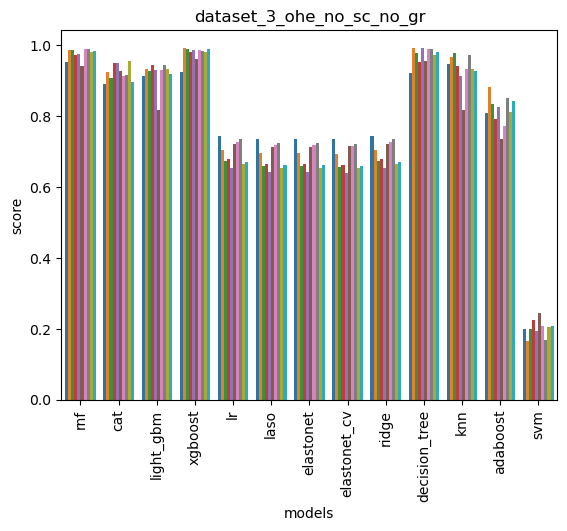

In [54]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_3_ohe_no_sc_no_gr')

In [88]:
import seaborn as sns

Text(0.5, 1.0, 'dataset_3_ohe_no_sc_no_gr')

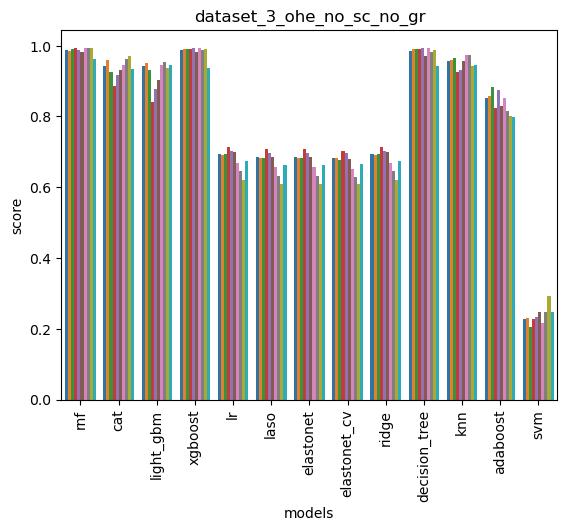

In [89]:
#all conct
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_3_ohe_no_sc_no_gr')